In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from joypy import joyplot 

In [2]:
# df=pd.read_csv('Indian_Govt_2011_Census_Data.csv')
#df.head()

In [3]:
# df=pd.read_csv('Indian_Govt_2011_Census_Data.csv',skiprows=[0,3])
df=pd.read_csv('Indian_Govt_2011_Census_Data.csv',skiprows=[0,2,3])
# The first row was consisting of a Title (Text)
# I am discarding 3rd and 4th rows because in actual they must be having multi column but here
# THere is a mess the sub category of column is treated as a separate row (With remaining values a Nan)

# print(df.tail())

# We need to clean in the starting and in the ending areas of the csv file
# There is lot of unnecessary text in the end of the csv file

# Only the 1992 entries from the remaining data columns are useful for us
# How ? => I have seen in the excel sheet

df=df[:19992]
df
# Cleaned the data base completely => In terms of clearing the mess(Both the start and ending portion)

State  Code District Code Sub District Code  \
0              0.0           000             00000   
1              0.0           000             00000   
2              0.0           000             00000   
3              1.0           000             00000   
4              1.0           000             00000   
...            ...           ...               ...   
19987         35.0           640             05923   
19988         35.0           640             05923   
19989         35.0           640             05924   
19990         35.0           640             05924   
19991         35.0           640             05924   

      India/ State/ Union Territory/ District/ Sub-district  \
0                                                  INDIA      
1                                                  INDIA      
2                                                  INDIA      
3                                                  STATE      
4                                                  STATE      
...                                                  ...      
19987                                       SUB-DISTRICT      
19988                                       SUB-DISTRICT      
19989                                       SUB-DISTRICT      
19990                                       SUB-DISTRICT      
19991                                       SUB-DISTRICT      

                     Name Total/\nRural/\nUrban Number of villages Unnamed: 7  \
0                INDIA @&                 Total            597,608     43,324   
1                 INDIA $                 Rural            597,608     43,324   
2                 INDIA $                 Urban                  0          0   
3      JAMMU & KASHMIR @&                 Total              6,337        216   
4         JAMMU & KASHMIR                 Rural              6,337        216   
...                   ...                   ...                ...        ...   
19987          Port Blair                 Rural                 30          3   
19988          Port Blair                 Urban                  0          0   
19989      Little Andaman                 Total                 16          3   
19990      Little Andaman                 Rural                 16          3   
19991      Little Andaman                 Urban                  0          0   

      Number of towns Number of households     Population  Unnamed: 11  \
0               7,933          249,501,663  1,210,854,977  623,270,258   
1                   0          168,612,897    833,748,852  427,781,058   
2               7,933           80,888,766    377,106,125  195,489,200   
3                 122            2,119,718     12,541,302    6,640,662   
4                   0            1,553,433      9,108,060    4,774,477   
...               ...                  ...            ...          ...   
19987               0                8,083         32,969       18,322   
19988               3               33,390        132,785       71,089   
19989               0                5,093         18,823        9,964   
19990               0                5,093         18,823        9,964   
19991               0                    0              0            0   

       Unnamed: 12  Area\n (In sq. km) Population per sq. km.  
0      587,584,719          3287469.00                    382  
1      405,967,794          3101473.97                    279  
2      181,616,925           102252.03                  3,685  
3        5,900,640           222236.00                    124  
4        4,333,583           220990.10                     91  
...            ...                 ...                    ...  
19987       14,647              520.01                     63  
19988       61,696               28.40                  4,676  
19989        8,859              780.15                     24  
19990        8,859              780.15                     24  
19991            0                0

In [4]:
# Mapping Old column names (irrelevant) to relevant set of columns
Columns_Updation_Mapping={
    'State Code': 'State_code',
    'District Code': 'District_code',
    'Sub District Code': 'Sub_district_code',
    'India/ State/ Union Territory/ District/ Sub-district': 'Regional_Category',
    'Name' : 'Regional_Specification',
    'Total/\nRural/\nUrban': 'Total_rural_urban',
    'Number of villages': 'No_of_Inhabited_villages',
    'Unnamed: 7': 'No_of_Habited_villages',
    'Number of towns': 'No_of_towns',
    'Number of households': 'No_of_households',
    'Population': 'Total_population',
    'Unnamed: 11': 'Male_population',
    'Unnamed: 12': 'Female_population',
    'Area\n (In sq. km)': 'area_sq_km',
    'Population per sq. km.': 'Population_density'
}
df.rename(columns=Columns_Updation_Mapping, inplace=True)
df.head(10)

State  Code District_code Sub_district_code Regional_Category  \
0          0.0           000             00000             INDIA   
1          0.0           000             00000             INDIA   
2          0.0           000             00000             INDIA   
3          1.0           000             00000             STATE   
4          1.0           000             00000             STATE   
5          1.0           000             00000             STATE   
6          1.0           001             00000          DISTRICT   
7          1.0           001             00000          DISTRICT   
8          1.0           001             00000          DISTRICT   
9          1.0           001             00001      SUB-DISTRICT   

  Regional_Specification Total_rural_urban No_of_Inhabited_villages  \
0               INDIA @&             Total                  597,608   
1                INDIA $             Rural                  597,608   
2                INDIA $             Urban                        0   
3     JAMMU & KASHMIR @&             Total                    6,337   
4        JAMMU & KASHMIR             Rural                    6,337   
5        JAMMU & KASHMIR             Urban                        0   
6                Kupwara             Total                      353   
7                Kupwara             Rural                      353   
8                Kupwara             Urban                        0   
9                Kupwara             Total                      118   

  No_of_Habited_villages No_of_towns No_of_households Total_population  \
0                 43,324       7,933      249,501,663    1,210,854,977   
1                 43,324           0      168,612,897      833,748,852   
2                      0       7,933       80,888,766      377,106,125   
3                    216         122        2,119,718       12,541,302   
4                    216           0        1,553,433        9,108,060   
5                      0         122          566,285        3,433,242   
6                      9          10          113,929          870,354   
7                      9           0          101,930          765,625   
8                      0          10           11,999          104,729   
9                      4           7           63,022          540,914   

  Male_population Female_population  area_sq_km Population_density  
0     623,270,258       587,584,719  3287469.00                382  
1     427,781,058       405,967,794  3101473.97                279  
2     195,489,200       181,616,925   102252.03              3,685  
3       6,640,662         5,900,640   222236.00                124  
4       4,774,477         4,333,583   220990.10                 91  
5       1,866,185         1,567,057     1245.90              2,755  
6         474,190           396,164     2379.00                366  
7         412,038           353,587     2331.66                328  
8          62,152            42,577       47.34              2,212  
9         297,837           243,077      301.94              1,791

In [5]:
print(df.dtypes)
# Columns data type to be changed (From Index 6 in column) => Till the end
#Modifiable columns
columns=['No_of_Inhabited_villages','No_of_Habited_villages','No_of_towns','No_of_households','Total_population','Male_population','Female_population','Population_density']
# Error => "could not convert string to float: '597,608'" occurs when you try to convert a string value that contains a (,) 
# As a thousands separator to a float value. In Python, float values should use a dot (.) as the decimal separator, and not a comma.
for x in columns :
    df[x]=df[x].str.replace(',', '').astype(float)
# Now datatypes are appropriately modified
# State Code is in float format we need to convert it into object type
df['State  Code']=df['State  Code'].astype(int)
# First convert it into integer type
df['State  Code']=df['State  Code'].astype(object)
# print(df.dtypes)

State  Code                 float64
District_code                object
Sub_district_code            object
Regional_Category            object
Regional_Specification       object
Total_rural_urban            object
No_of_Inhabited_villages     object
No_of_Habited_villages       object
No_of_towns                  object
No_of_households             object
Total_population             object
Male_population              object
Female_population            object
area_sq_km                  float64
Population_density           object
dtype: object


In [6]:
# Remove unwanted characters from column 'B' using regular expressions
df['Regional_Specification'] = df['Regional_Specification'].apply(lambda x: re.sub('[@&^$]', '', x))
df['Regional_Specification'] = df['Regional_Specification'].str.replace('KASHMIR ', 'KASHMIR')

In [7]:
df.head()
Pan_Indian_Information=df[:3]
Pan_Indian_Information
df=df[3:]
df.reset_index(drop=True)


State  Code District_code Sub_district_code Regional_Category  \
0               1           000             00000             STATE   
1               1           000             00000             STATE   
2               1           000             00000             STATE   
3               1           001             00000          DISTRICT   
4               1           001             00000          DISTRICT   
...           ...           ...               ...               ...   
19984          35           640             05923      SUB-DISTRICT   
19985          35           640             05923      SUB-DISTRICT   
19986          35           640             05924      SUB-DISTRICT   
19987          35           640             05924      SUB-DISTRICT   
19988          35           640             05924      SUB-DISTRICT   

      Regional_Specification Total_rural_urban  No_of_Inhabited_villages  \
0             JAMMU  KASHMIR             Total                    6337.0   
1             JAMMU  KASHMIR             Rural                    6337.0   
2             JAMMU  KASHMIR             Urban                       0.0   
3                    Kupwara             Total                     353.0   
4                    Kupwara             Rural                     353.0   
...                      ...               ...                       ...   
19984             Port Blair             Rural                      30.0   
19985             Port Blair             Urban                       0.0   
19986         Little Andaman             Total                      16.0   
19987         Little Andaman             Rural                      16.0   
19988         Little Andaman             Urban                       0.0   

       No_of_Habited_villages  No_of_towns  No_of_households  \
0                       216.0        122.0         2119718.0   
1                       216.0          0.0         1553433.0   
2                         0.0        122.0          566285.0   
3                         9.0         10.0          113929.0   
4                         9.0          0.0          101930.0   
...                       ...          ...               ...   
19984                     3.0          0.0            8083.0   
19985                     0.0          3.0           33390.0   
19986                     3.0          0.0            5093.0   
19987                     3.0          0.0            5093.0   
19988                     0.0          0.0               0.0   

       Total_population  Male_population  Female_population  area_sq_km  \
0            12541302.0        6640662.0          5900640.0   222236.00   
1             9108060.0        4774477.0          4333583.0   220990.10   
2             3433242.0        1866185.0          1567057.0     1245.90   
3              870354.0         474190.0           396164.0     2379.00   
4              765625.0         412038.0           353587.0     2331.66   
...                 ...              ...                ...         ...   
19984           32969.0          18322.0            14647.0      520.01   
19985          132785.0          71089.0            61696.0       28.40   
19986           18823.0           9964.0             8859.0      780.15   
19987           18823.0           9964.0             8859.0      780.15   
19988               0.0              0.0                0.0        0.00   

       Population_density  
0                   124.0  
1                    91.0  
2                  2755.0  
3                   366.0  
4                   328.0  
...                   ...  
19984                63.0  
19985              4676.0  
19986                24.0  
19987                24.0  
19988                 0.0  

[19989 rows x 15 columns]

In [8]:
df1=df.set_index(['Regional_Category','Regional_Specification','Total_rural_urban'])
# Let's discard StateCOde  , District_code and Sub_district_Code (won't help much in our analysis)
Codes=['State  Code','District_code','Sub_district_code']
# Discarding unnecessary codes of regions
df1=df1.iloc[:,~df1.columns.isin(Codes)]
# Discarding the duplicate rows
df1=df1.drop_duplicates()
# Sorting the indices basing upon the Regional Specification
df1 = df1.sort_values(by='Regional_Specification')
df1.head(30)

No_of_Inhabited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                             
SUB-DISTRICT       'N' Thingdawl           Rural                                  11.0   
                                           Urban                                   0.0   
                                           Total                                  11.0   
                   Balod                   Rural                                  91.0   
                                           Urban                                   0.0   
                                           Total                                  91.0   
                   Devsar                  Rural                                  15.0   
                                           Urban                                   0.0   
                                           Total                                  15.0   
                   Nabadwip                Urban                                   0.0   
                                           Rural                                  21.0   
                                           Total                                  21.0   
                  A.Konduru                Total                                  13.0   
STATE             ANDAMAN  NICOBAR ISLANDS Urban                                   0.0   
                                           Total                                 396.0   
                                           Rural                                 396.0   
                  ANDHRA PRADESH           Total                               26286.0   
                                           Urban                                   0.0   
                                           Rural                               26286.0   
                  ARUNACHAL PRADESH        Urban                                   0.0   
                                           Rural                                5258.0   
                                           Total                                5258.0   
                  ASSAM                    Rural                               25372.0   
                                           Urban                                   0.0   
                                           Total                               25372.0   
SUB-DISTRICT      Aali                     Total                                 126.0   
                  Aalo                     Total                                  44.0   
                                           Rural                                  44.0   
                                           Urban                                   0.0   
                  Abdasa                   Total                                 133.0   

                                                              No_of_Habited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                           
SUB-DISTRICT       'N' Thingdawl           Rural                                 9.0   
                                           Urban                                 0.0   
                                           Total                                 9.0   
                   Balod                   Rural                                 1.0   
                                           Urban                                 0.0   
                                           Total                                 1.0   
                   Devsar                  Rural                                 1.0   
                                           Urban                                 0.0   
                                           Total                                 1.0   
                   Nabadwip                Urban                                 0.0   
                                           Rural                                 0.0   
                                     

In [9]:
# states=['ANDHRA PRADESH','GUJARAT','TAMIL NADU','KARNATAKA','TAMIL NADU']
state_x = df1.loc[df1.index.get_level_values('Regional_Category')=='STATE']
#For Urban Areas
state_x_Urban = state_x.loc[state_x.index.get_level_values('Total_rural_urban')=='Urban']
# For Rural areas
state_x_Rural=state_x.loc[state_x.index.get_level_values('Total_rural_urban')=='Rural']
# For States (Urban and Rural areas both inclueded)
state_x_Total=state_x.loc[state_x.index.get_level_values('Total_rural_urban')=='Total']
state_x_Total.head()

No_of_Inhabited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                             
STATE             ANDAMAN  NICOBAR ISLANDS Total                                 396.0   
                  ANDHRA PRADESH           Total                               26286.0   
                  ARUNACHAL PRADESH        Total                                5258.0   
                  ASSAM                    Total                               25372.0   
                  BIHAR                    Total                               39073.0   

                                                              No_of_Habited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                           
STATE             ANDAMAN  NICOBAR ISLANDS Total                               159.0   
                  ANDHRA PRADESH           Total                              1514.0   
                  ARUNACHAL PRADESH        Total                               331.0   
                  ASSAM                    Total                              1023.0   
                  BIHAR                    Total                              5801.0   

                                                              No_of_towns  \
Regional_Category Regional_Specification   Total_rural_urban                
STATE             ANDAMAN  NICOBAR ISLANDS Total                      5.0   
                  ANDHRA PRADESH           Total                    353.0   
                  ARUNACHAL PRADESH        Total                     27.0   
                  ASSAM                    Total                    214.0   
                  BIHAR                    Total                    199.0   

                                                              No_of_households  \
Regional_Category Regional_Specification   Total_rural_urban                     
STATE             ANDAMAN  NICOBAR ISLANDS Total                       94551.0   
                  ANDHRA PRADESH           Total                    21022588.0   
                  ARUNACHAL PRADESH        Total                      270577.0   
                  ASSAM                    Total                     6406471.0   
                  BIHAR                    Total                    18913565.0   

                                                              Total_population  \
Regional_Category Regional_Specification   Total_rural_urban                     
STATE             ANDAMAN  NICOBAR ISLANDS Total                      380581.0   
                  ANDHRA PRADESH           Total                    84580777.0   
                  ARUNACHAL PRADESH        Total                     1383727.0   
                  ASSAM                    Total                    31205576.0   
                  BIHAR                    Total                   104099452.0   

                                                              Male_population  \
Regional_Category Regional_Specification   Total_rural_urban                    
STATE             ANDAMAN  NICOBAR ISLANDS Total                     202871.0   
                  ANDHRA PRADESH           Total                   42442146.0   
                  ARUNACHAL PRADESH        Total                     713912.0   
                  ASSAM                    Total                   15939443.0   
                  BIHAR                    Total                   54278157.0   

                                                              Female_population  \
Regional_Category Regional_Specification   Total_rural_urban                      
STATE             ANDAMAN  NICOBAR ISLANDS Total                       177710.0   
                  ANDHRA PRADESH           Total                     42138631.0   
                  ARUNACHAL PRADESH        Total                       669815.0   
                  ASSAM                    Total                     15266133.0   
                  BIHAR                    Total          

# Population density analysis for various statest which has the lowest?

In [10]:
state_x_Total.reset_index(inplace=True)
state_x_Total.set_index('Regional_Specification',inplace=True)

state_x_Urban.reset_index(inplace=True)
state_x_Urban.set_index('Regional_Specification',inplace=True)

state_x_Rural.reset_index(inplace=True)
state_x_Rural.set_index('Regional_Specification',inplace=True)

state_pop_density = state_x_Total['Population_density']
state_Female_pop_density = state_x_Total['Male_population']
state_Male_pop_density = state_x_Total['Female_population']

state_Urban_pop_density = state_x_Urban['Population_density']

state_Rural_pop_density = state_x_Rural['Population_density']

# Identify the state with the highest and lowest population density
max_density_state = state_pop_density.idxmax()
min_density_state = state_pop_density.idxmin()

max_Female_density_state = state_Female_pop_density.idxmax()
min_Female_density_state = state_Female_pop_density.idxmin()

max_male_density_state = state_Male_pop_density.idxmax()
min_male_density_state = state_Male_pop_density.idxmin()

max_Urban_density_state = state_Urban_pop_density.idxmax()
min_Urban_density_state = state_Urban_pop_density.idxmin()

max_Rural_density_state = state_Rural_pop_density.idxmax()
min_Rural_density_state = state_Rural_pop_density.idxmin()

# Print the results
print("State with highest population density: ", max_density_state,end="  ")
print()
print("State with lowest population density: ", min_density_state)
print("State with highest Urban population density: ", max_Urban_density_state)
print("State with lowest Urban population density: ", min_Urban_density_state)
print("State with highest Rural population density: ", max_Rural_density_state)
print("State with lowest Urban population density: ", min_Rural_density_state)

# print("\nPopulation density by state:\n", state_pop_density)


State with highest population density:  NCT OF DELHI  
State with lowest population density:  ARUNACHAL PRADESH
State with highest Urban population density:  NCT OF DELHI
State with lowest Urban population density:  MIZORAM
State with highest Rural population density:  CHANDIGARH
State with lowest Urban population density:  MIZORAM


In [11]:
print("State with highest Male population density: ", max_male_density_state)
print("State with lowest Male population density: ", min_male_density_state)
print("State with highest Female population density: ", max_Female_density_state)
print("State with lowest Female population density: ", min_Female_density_state)

State with highest Male population density:  UTTAR PRADESH
State with lowest Male population density:  LAKSHADWEEP
State with highest Female population density:  UTTAR PRADESH
State with lowest Female population density:  LAKSHADWEEP


In [12]:
# plt.figure(figsize=(10, 8))
# state_x.reset_index(inplace=True)
# ax = sns.barplot(x="No_of_households",y='Regional_Specification', data=df,hue='Total_rural_urban')
# ax.set_xscale("log")
# plt.xlabel('Number of Households (log scale)')
# plt.ylabel('State')
# plt.title('Number of Households by State (Total Population)')

# # Show the plot
# plt.show()

In [13]:
state_dfs= df1.loc[df1.index.get_level_values('Regional_Category')=='STATE']
state_dfs.head()

No_of_Inhabited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                             
STATE             ANDAMAN  NICOBAR ISLANDS Urban                                   0.0   
                                           Total                                 396.0   
                                           Rural                                 396.0   
                  ANDHRA PRADESH           Total                               26286.0   
                                           Urban                                   0.0   

                                                              No_of_Habited_villages  \
Regional_Category Regional_Specification   Total_rural_urban                           
STATE             ANDAMAN  NICOBAR ISLANDS Urban                                 0.0   
                                           Total                               159.0   
                                           Rural                               159.0   
                  ANDHRA PRADESH           Total                              1514.0   
                                           Urban                                 0.0   

                                                              No_of_towns  \
Regional_Category Regional_Specification   Total_rural_urban                
STATE             ANDAMAN  NICOBAR ISLANDS Urban                      5.0   
                                           Total                      5.0   
                                           Rural                      0.0   
                  ANDHRA PRADESH           Total                    353.0   
                                           Urban                    353.0   

                                                              No_of_households  \
Regional_Category Regional_Specification   Total_rural_urban                     
STATE             ANDAMAN  NICOBAR ISLANDS Urban                       36021.0   
                                           Total                       94551.0   
                                           Rural                       58530.0   
                  ANDHRA PRADESH           Total                    21022588.0   
                                           Urban                     6788201.0   

                                                              Total_population  \
Regional_Category Regional_Specification   Total_rural_urban                     
STATE             ANDAMAN  NICOBAR ISLANDS Urban                      143488.0   
                                           Total                      380581.0   
                                           Rural                      237093.0   
                  ANDHRA PRADESH           Total                    84580777.0   
                                           Urban                    28219075.0   

                                                              Male_population  \
Regional_Category Regional_Specification   Total_rural_urban                    
STATE             ANDAMAN  NICOBAR ISLANDS Urban                      76584.0   
                                           Total                     202871.0   
                                           Rural                     126287.0   
                  ANDHRA PRADESH           Total                   42442146.0   
                                           Urban                   14198905.0   

                                                              Female_population  \
Regional_Category Regional_Specification   Total_rural_urban                      
STATE             ANDAMAN  NICOBAR ISLANDS Urban                        66904.0   
                                           Total                       177710.0   
                                           Rural                       110806.0   
                  ANDHRA PRADESH           Total                     42138631.0   
                                           Urban          

In [14]:
# states=['ANDHRA PRADESH','GUJARAT','TAMIL NADU','KARNATAKA','TAMIL NADU']
District_x = df1.loc[df1.index.get_level_values('Regional_Category')=='DISTRICT']
#For Urban Areas
District_x_Urban = District_x.loc[District_x.index.get_level_values('Total_rural_urban')=='Urban']
# For Rural areas
District_x_Rural=District_x.loc[District_x.index.get_level_values('Total_rural_urban')=='Rural']
# For States (Urban and Rural areas both inclueded)
District_x_Total=District_x.loc[District_x.index.get_level_values('Total_rural_urban')=='Total']

In [15]:
District_x_Total.reset_index(inplace=True)
District_x_Total.set_index('Regional_Specification',inplace=True)

District_x_Urban.reset_index(inplace=True)
District_x_Urban.set_index('Regional_Specification',inplace=True)

District_x_Rural.reset_index(inplace=True)
District_x_Rural.set_index('Regional_Specification',inplace=True)

# df1.index.get_level_values('Regional_Specification').unique()

In [16]:
non_unique_index = District_x_Total.index.duplicated()
non_unique_index1 = District_x_Urban.index.duplicated()
non_unique_index2 = District_x_Rural.index.duplicated()
temp=District_x_Total.iloc[non_unique_index]
temp1=District_x_Urban.iloc[non_unique_index1]
temp2=District_x_Rural.iloc[non_unique_index2]
# temp1
temp1
temp2

Regional_Category Total_rural_urban  \
Regional_Specification                                       
Aurangabad                      DISTRICT             Rural   
Bijapur                         DISTRICT             Rural   
Bilaspur                        DISTRICT             Rural   
Hamirpur                        DISTRICT             Rural   
Pratapgarh                      DISTRICT             Rural   
Raigarh                         DISTRICT             Rural   

                        No_of_Inhabited_villages  No_of_Habited_villages  \
Regional_Specification                                                     
Aurangabad                                1742.0                   105.0   
Bijapur                                    679.0                    13.0   
Bilaspur                                  1566.0                    33.0   
Hamirpur                                  1671.0                    54.0   
Pratapgarh                                2183.0                    34.0   
Raigarh                                   1426.0                    40.0   

                        No_of_towns  No_of_households  Total_population  \
Regional_Specification                                                    
Aurangabad                      0.0          355036.0         2303219.0   
Bijapur                         0.0          309751.0         1675353.0   
Bilaspur                        0.0          456635.0         1983759.0   
Hamirpur                        0.0           98115.0          423338.0   
Pratapgarh                      0.0          505129.0         3033899.0   
Raigarh                         0.0          312800.0         1247682.0   

                        Male_population  Female_population  area_sq_km  \
Regional_Specification                                                   
Aurangabad                    1194619.0          1108600.0     3244.13   
Bijapur                        857562.0           817791.0    10234.53   
Bilaspur                      1002520.0           981239.0     7983.44   
Hamirpur                       200748.0           222590.0     1106.39   
Pratapgarh                    1515583.0          1518316.0     3669.13   
Raigarh                        623817.0           623865.0     6966.50   

                        Population_density  
Regional_Specification                      
Aurangabad                           710.0  
Bijapur                              164.0  
Bilaspur                             248.0  
Hamirpur                             383.0  
Pratapgarh                           827.0  
Raigarh                              179.0

In [17]:
states=['ANDHRA PRADESH','GUJARAT','TAMIL NADU','KARNATAKA','TAMIL NADU']
state_df_z = df1.loc[df1.index.get_level_values('Regional_Specification').isin(states)]
state_df_z=state_df_z.sort_index()
state_df_z

No_of_Inhabited_villages  \
Regional_Category Regional_Specification Total_rural_urban                             
STATE             ANDHRA PRADESH         Rural                               26286.0   
                                         Total                               26286.0   
                                         Urban                                   0.0   
                  GUJARAT                Rural                               17843.0   
                                         Total                               17843.0   
                                         Urban                                   0.0   
                  KARNATAKA              Rural                               27397.0   
                                         Total                               27397.0   
                                         Urban                                   0.0   
                  TAMIL NADU             Rural                               15049.0   
                                         Total                               15049.0   
                                         Urban                                   0.0   

                                                            No_of_Habited_villages  \
Regional_Category Regional_Specification Total_rural_urban                           
STATE             ANDHRA PRADESH         Rural                              1514.0   
                                         Total                              1514.0   
                                         Urban                                 0.0   
                  GUJARAT                Rural                               382.0   
                                         Total                               382.0   
                                         Urban                                 0.0   
                  KARNATAKA              Rural                              1943.0   
                                         Total                              1943.0   
                                         Urban                                 0.0   
                  TAMIL NADU             Rural                               930.0   
                                         Total                               930.0   
                                         Urban                                 0.0   

                                                            No_of_towns  \
Regional_Category Regional_Specification Total_rural_urban                
STATE             ANDHRA PRADESH         Rural                      0.0   
                                         Total                    353.0   
                                         Urban                    353.0   
                  GUJARAT                Rural                      0.0   
                                         Total                    348.0   
                                         Urban                    348.0   
                  KARNATAKA              Rural                      0.0   
                                         Total                    347.0   
                                         Urban                    347.0   
                  TAMIL NADU             Rural                      0.0   
                                         Total                   1097.0   
                                         Urban                   1097.0   

                                                            No_of_households  \
Regional_Category Regional_Specification Total_rural_urban                     
STATE             ANDHRA PRADESH         Rural                    14234387.0   
                                         Total                    21022588.0   
                                         Urban                     6788201.0   
                  GUJARAT                Rural                     6773558.0   
                                         Total                    12248428.0   
           

In [18]:
District_x_Total = District_x_Total[~non_unique_index].drop_duplicates()
District_x_Urban = District_x_Urban[~non_unique_index1].drop_duplicates()
District_x_Rural = District_x_Rural[~non_unique_index2].drop_duplicates()
# District_x_Total.index.duplicated().sum()

In [19]:

new_index = {'Bijapur': 'Bijapur_os','Bilaspur': 'Bilaspur_os', 'Hamirpur':'Hamirpur_os', 'Pratapgarh':'Pratapgarh_os', 'Raigarh': 'Raigarh_os'}
new_index1 = {'Aurangabad':'Aurangabad_ox','Bijapur':'Bijapur_ox','Bilaspur':'Bilaspur_ox','Hamirpur':'Hamirpur_ox','Pratapgarh':'Pratapgarh_ox','Raigarh':'Raigarh_ox'}
new_index2 = {'Aurangabad':'Aurangabad_oy','Bijapur':'Bijapur_oy','Bilaspur':'Bilaspur_oy','Hamirpur':'Hamirpur_oy','Pratapgarh':'Pratapgarh_oy','Raigarh':'Raigarh_oy'}

temp=temp.rename(index=new_index)
temp1=temp1.rename(index=new_index1)
temp2=temp2.rename(index=new_index2)
temp2

District_x_Total=pd.concat([District_x_Total, temp], axis=0)
District_x_Urban=pd.concat([District_x_Urban, temp1], axis=0)
District_x_Rural=pd.concat([District_x_Rural, temp2], axis=0)
District_x_Total.reset_index(inplace=True)
District_x_Total.set_index(['Regional_Specification'])

# Let's update District_x now such that it won't contain any repeated columns
District_x=pd.concat([District_x_Total, temp], axis=0)
District_x=pd.concat([District_x, temp1], axis=0)
District_x=pd.concat([District_x, temp2], axis=0)
District_x.index.duplicated().sum()
District_x_Total.index.duplicated().sum()

0

<AxesSubplot:xlabel='Male_population', ylabel='Count'>

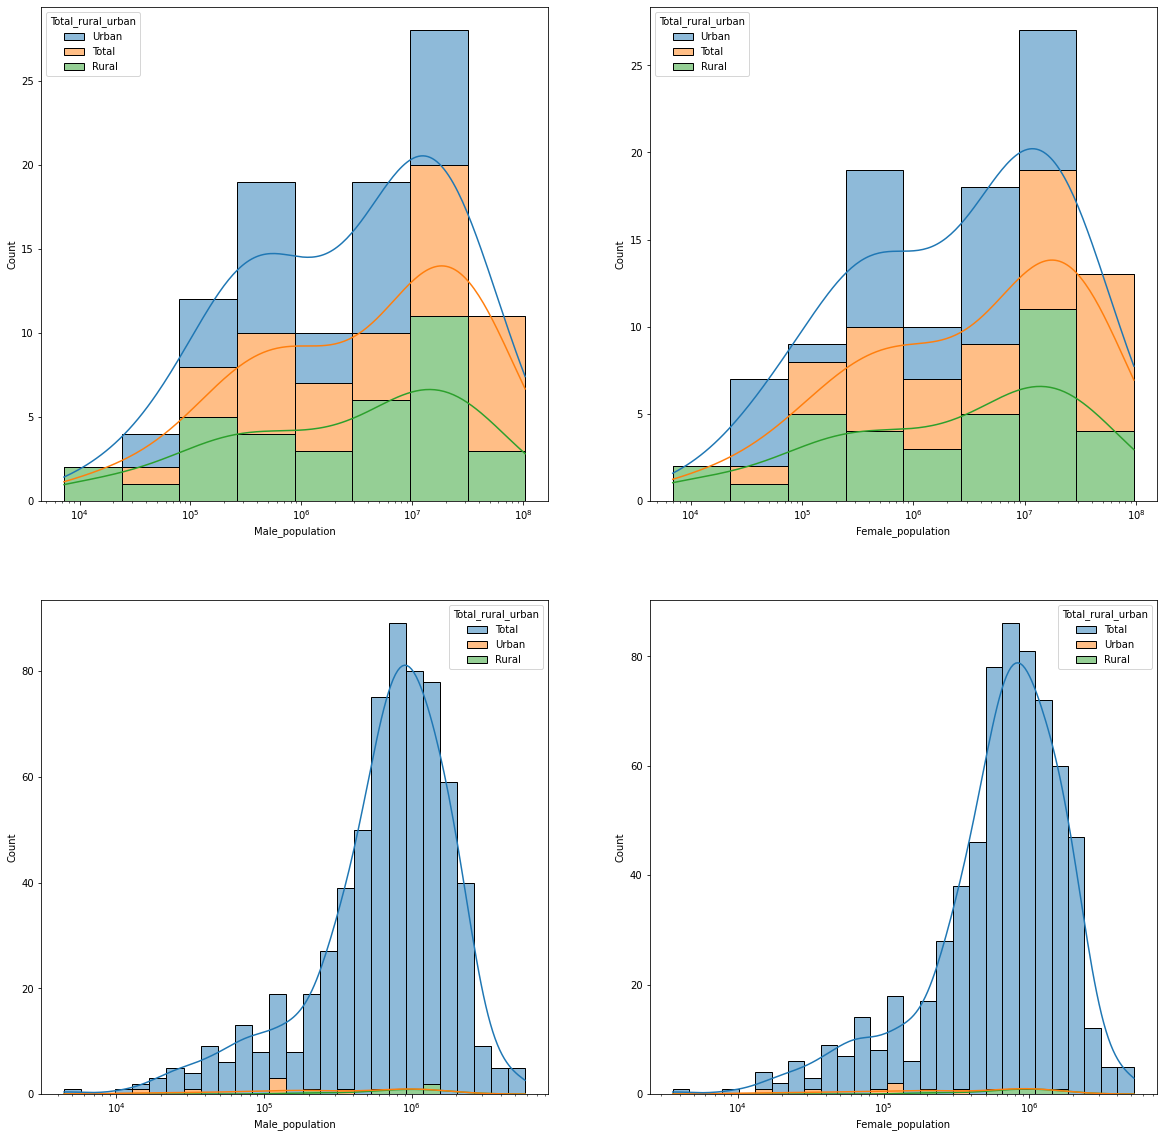

In [20]:
fig, axes = plt.subplots(2,2,figsize=(20,20))

state_x_mod=state_x.reset_index()
state_x_mod=state_x_mod[state_x_mod.Total_rural_urban!='Total']


sns.histplot(data=state_x, x="Male_population",hue="Total_rural_urban",multiple="stack",kde=True,ax=axes[0, 0],log_scale=True)
sns.histplot(data=state_x, x="Female_population",hue="Total_rural_urban",multiple="stack",kde=True,ax=axes[0, 1],log_scale=True)
sns.histplot(data=District_x, x="Female_population",hue="Total_rural_urban",multiple="stack",kde=True,ax=axes[1, 1],log_scale=True)
sns.histplot(data=District_x, x="Male_population",hue="Total_rural_urban",multiple="stack",kde=True,ax=axes[1, 0],log_scale=True)


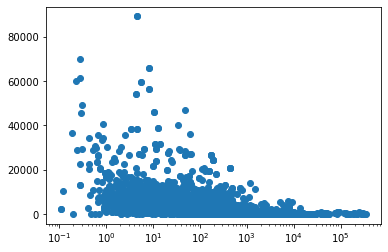

In [21]:
pop_density = df["Population_density"]
area = df["area_sq_km"]

# create the scatter plot
plt.scatter(area, pop_density)
plt.xscale('log')

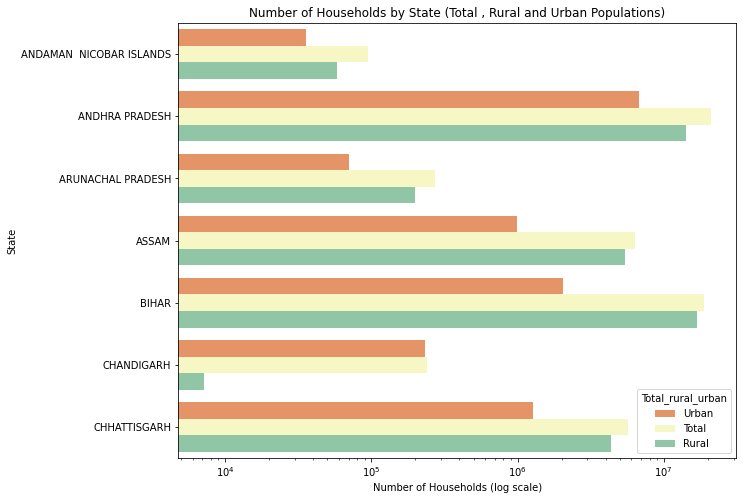

In [22]:
plt.figure(figsize=(10, 8))
state_x.reset_index(inplace=True)
ax = sns.barplot(x="No_of_households",y='Regional_Specification', data=state_x.loc[:20],hue='Total_rural_urban',palette='Spectral')
ax.set_xscale("log")
plt.xlabel('Number of Households (log scale)')
plt.ylabel('State')
plt.title('Number of Households by State (Total , Rural and Urban Populations)')

# Show the plot
plt.show()

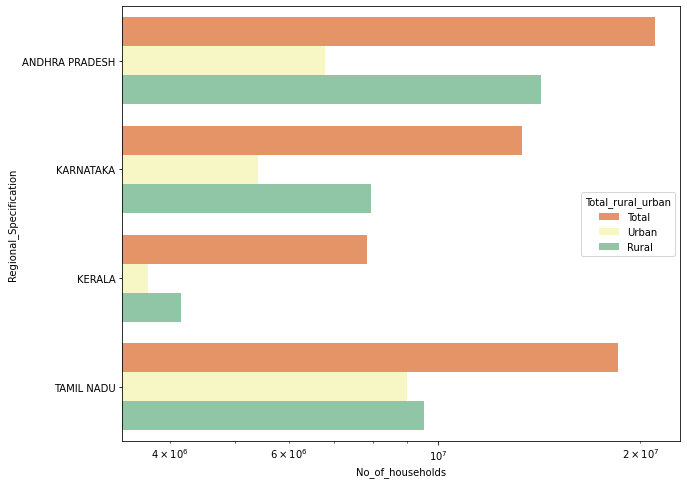

In [23]:
plt.figure(figsize=(10, 8))
Southern_India_idx=state_x["Regional_Specification"].isin(["KERALA","ANDHRA PRADESH",'TAMIL NADU','KARNATAKA'])
South=state_x[Southern_India_idx]
ax = sns.barplot(x="No_of_households",y='Regional_Specification', data=South,hue='Total_rural_urban',palette='Spectral')
ax.set_xscale("log")

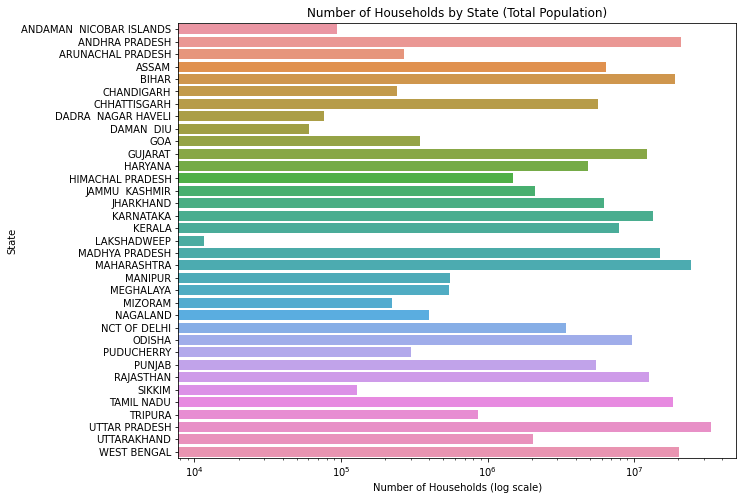

In [24]:
plt.figure(figsize=(10, 8))
state_y_Tot=state_x_Total.reset_index()
ax = sns.barplot(x="No_of_households",y='Regional_Specification', data=state_y_Tot)
ax.set_xscale("log")
plt.xlabel('Number of Households (log scale)')
plt.ylabel('State')
plt.title('Number of Households by State (Total Population)')

# Show the plot
plt.show()

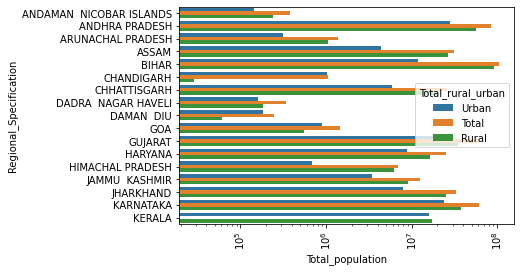

In [25]:
sns.barplot(data=state_x[:50], x="Total_population", y="Regional_Specification", hue="Total_rural_urban")
plt.xticks(rotation=90)
plt.xscale('log')
plt.show()


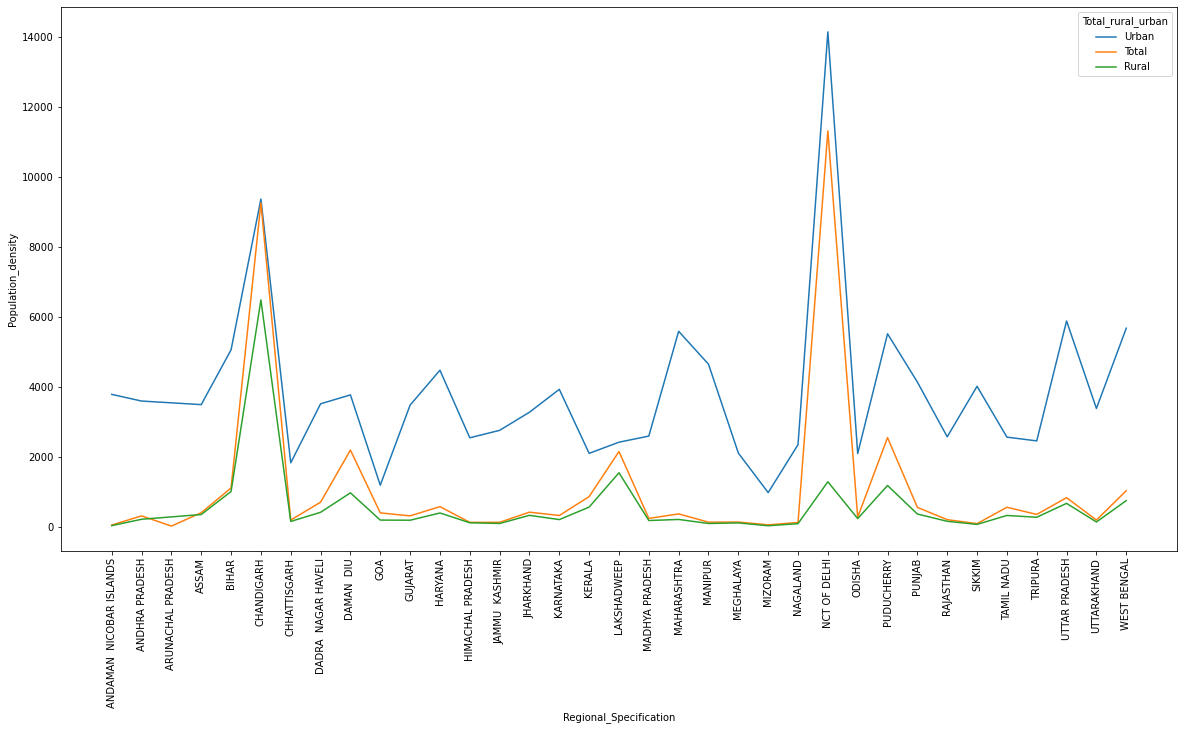

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=state_x, x="Regional_Specification", y="Population_density", hue="Total_rural_urban")
plt.xticks(rotation=90)
plt.show()

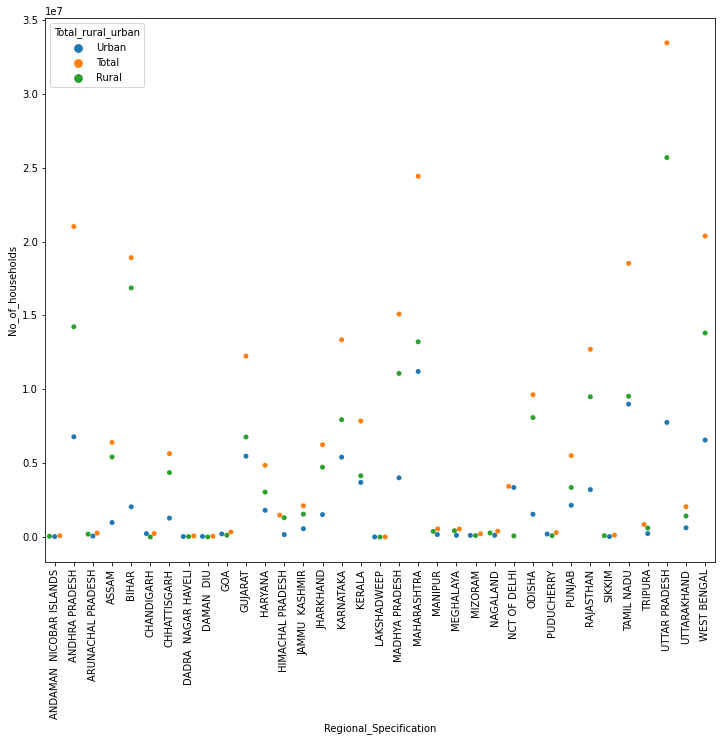

In [27]:
plt.figure(figsize=(12, 10))
sns.swarmplot(data=state_x, x="Regional_Specification", y="No_of_households", hue="Total_rural_urban")
plt.xticks(rotation=90)
plt.show()

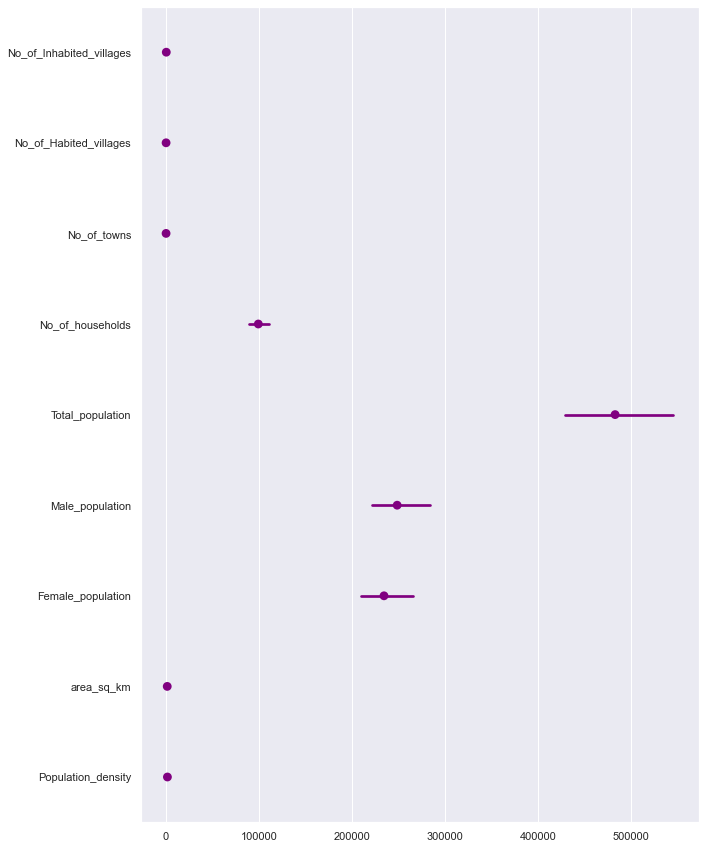

In [28]:
sns.set(rc={"figure.figsize":(10, 15)})
pa1=sns.pointplot(data=df1,join=False,orient='h',color='purple')

(<Figure size 720x1080 with 2 Axes>, [<AxesSubplot:>, <AxesSubplot:>])

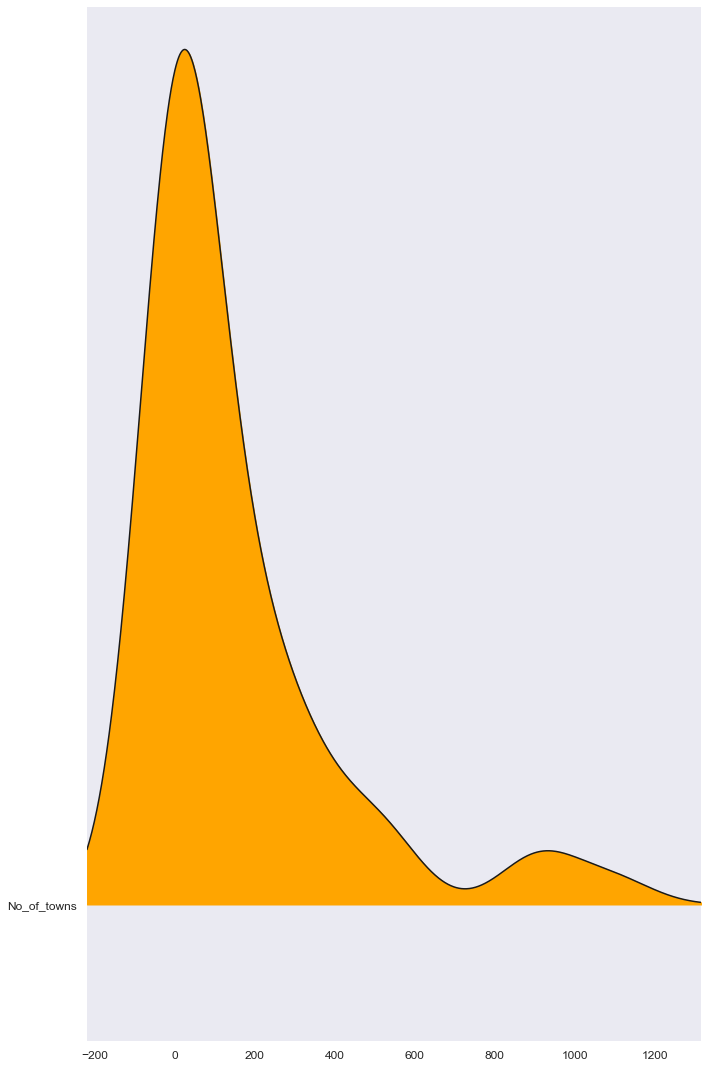

In [29]:
joyplot(state_x.iloc[:,5:6],color = 'Orange', fade = True,overlap = 0)

<Figure size 1440x1440 with 0 Axes>

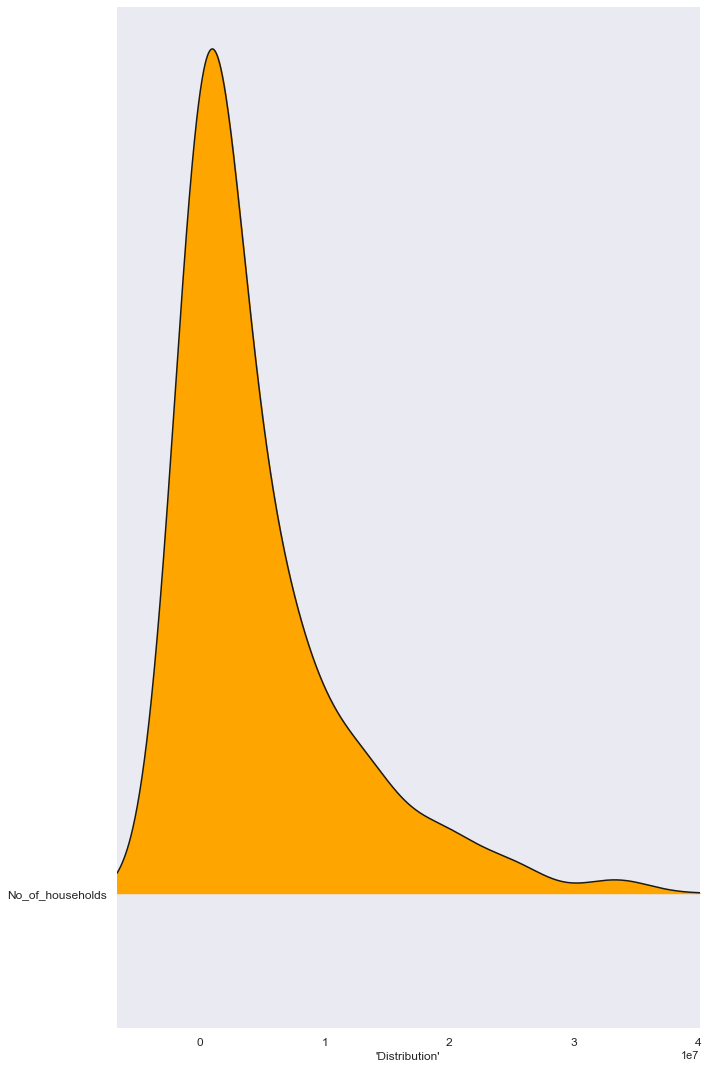

In [30]:
plt.figure(figsize=(20,20))
joyplot(state_x.iloc[:,6:7],color = 'Orange', fade = True,overlap = 0)
plt.xlabel("'Distribution'")
# plt.xscale('log')
plt.show()
# state_x

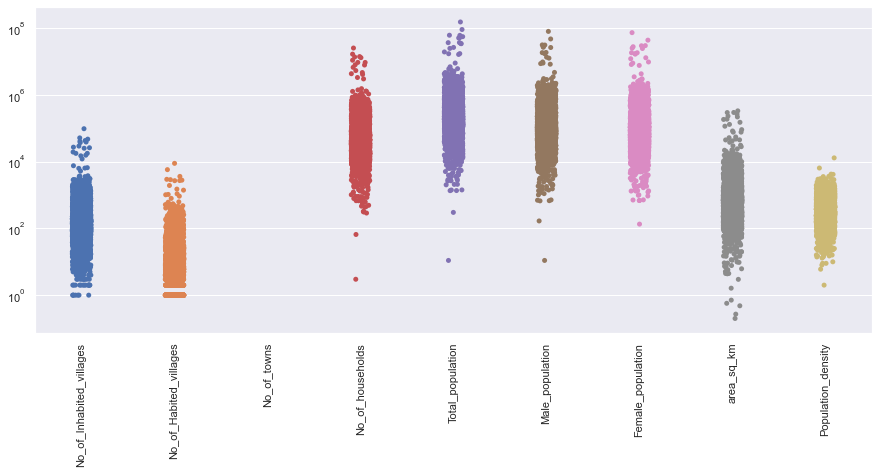

In [31]:
sns.set(rc={"figure.figsize":(15, 6)})
pa3=sns.stripplot(data=df1.loc[df1.index.get_level_values('Total_rural_urban')=='Rural']) # Strip plot for all columns
pa3.set_xticklabels(pa3.get_xticklabels(), rotation=90)
pa3.set_yscale('log')
print()

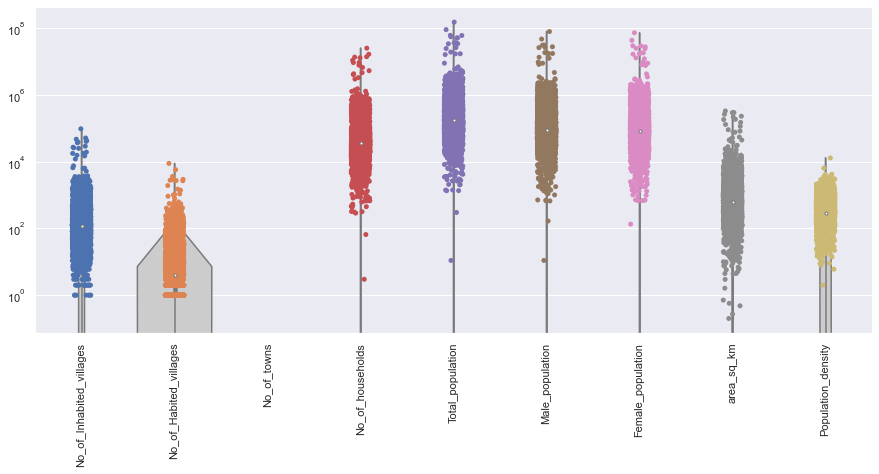

In [32]:
# ax=sns.stripplot(data=max_price)
sns.set(rc={"figure.figsize":(15, 6)})
pa3=sns.stripplot(data=df1.loc[df1.index.get_level_values('Total_rural_urban')=='Rural']) # Strip plot for all columns
pa3=sns.violinplot(data=df1.loc[df1.index.get_level_values('Total_rural_urban')=='Rural'],color="0.8")
pa3.set_xticklabels(pa3.get_xticklabels(), rotation=90)
pa3.set_yscale('log')
print()

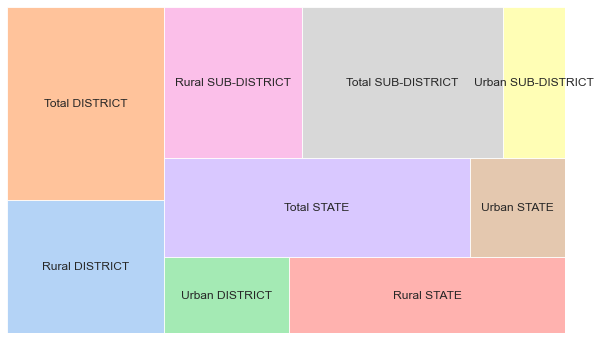

In [33]:
import squarify

# Prepare the data
df_treemap = df.groupby(['Regional_Category', 'Total_rural_urban']).sum()['Total_population'].reset_index()

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
color = sns.color_palette('pastel').as_hex()
squarify.plot(sizes=df_treemap['Total_population'], label=df_treemap['Total_rural_urban'] + ' ' + df_treemap['Regional_Category'], alpha=.8, color=color, ax=ax)
plt.axis('off')
plt.show()


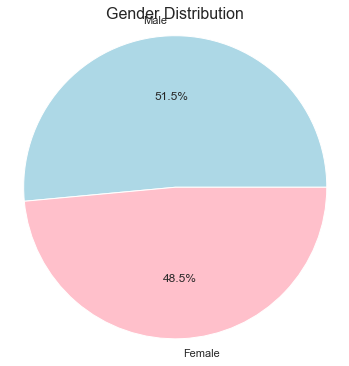

In [34]:
# Select rows where the 'Regional_Category' index has a value of 'STATE'
state_df = df1.loc[df1.index.get_level_values('Regional_Category') == 'STATE']

# Select rows where the 'Total_rural_urban' index has a value of 'Total'
state_df = state_df.loc[state_df.index.get_level_values('Total_rural_urban') == 'Total']

# Calculate the total male and female population
total_male_pop = state_df['Male_population'].sum()
total_female_pop = state_df['Female_population'].sum()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie([total_male_pop, total_female_pop], labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution', fontsize=16)
plt.axis('equal')
plt.show()

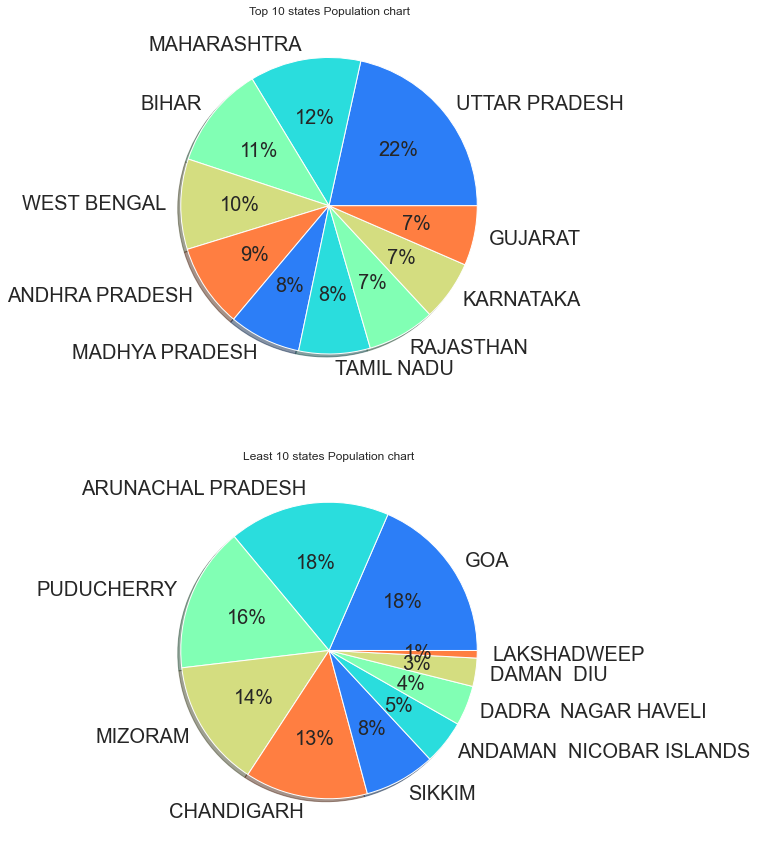

In [35]:
color=sns.color_palette('rainbow',5)
state_perc = state_x_Total['Total_population']/ state_x_Total['Total_population'].sum() * 100
state_perc=state_perc.sort_values(ascending=False)
Top_10=state_perc.head(10)
Least_10=state_perc.tail(10)

fig, axes = plt.subplots(2,figsize=(15,15))

axes[0].set_title("Top 10 states Population chart")
axes[1].set_title("Least 10 states Population chart")


axes[0].pie(Top_10,labels=Top_10.index,colors=color,autopct='%.0f%%',shadow=True,textprops={'fontsize': 20},)
axes[1].pie(Least_10,labels=Least_10.index,colors=color,autopct='%.0f%%',shadow=True,textprops={'fontsize': 20})

plt.show()

In [36]:
# state_x.loc[:21]

In [37]:
# state_pa_Urban=state_x_Urban.reset_index(inplace=True,drop=True)
# state_pa_Urban.
state_pa_Urban=state_x_Urban.loc[state_x_Urban.index.isin(["KERALA","ANDHRA PRADESH",'TAMIL NADU','KARNATAKA'])]
state_pa_Urban.head()

Regional_Category Total_rural_urban  \
Regional_Specification                                       
ANDHRA PRADESH                     STATE             Urban   
KARNATAKA                          STATE             Urban   
KERALA                             STATE             Urban   
TAMIL NADU                         STATE             Urban   

                        No_of_Inhabited_villages  No_of_Habited_villages  \
Regional_Specification                                                     
ANDHRA PRADESH                               0.0                     0.0   
KARNATAKA                                    0.0                     0.0   
KERALA                                       0.0                     0.0   
TAMIL NADU                                   0.0                     0.0   

                        No_of_towns  No_of_households  Total_population  \
Regional_Specification                                                    
ANDHRA PRADESH                353.0         6788201.0        28219075.0   
KARNATAKA                     347.0         5410370.0        23625962.0   
KERALA                        520.0         3704113.0        15934926.0   
TAMIL NADU                   1097.0         8996487.0        34917440.0   

                        Male_population  Female_population  area_sq_km  \
Regional_Specification                                                   
ANDHRA PRADESH               14198905.0         14020170.0     7854.50   
KARNATAKA                    12037303.0         11588659.0     6014.43   
KERALA                        7619358.0          8315568.0     7598.80   
TAMIL NADU                   17458910.0         17458530.0    13635.53   

                        Population_density  
Regional_Specification                      
ANDHRA PRADESH                      3593.0  
KARNATAKA                           3928.0  
KERALA                              2097.0  
TAMIL NADU                          2561.0

<AxesSubplot:xlabel='Regional_Specification'>

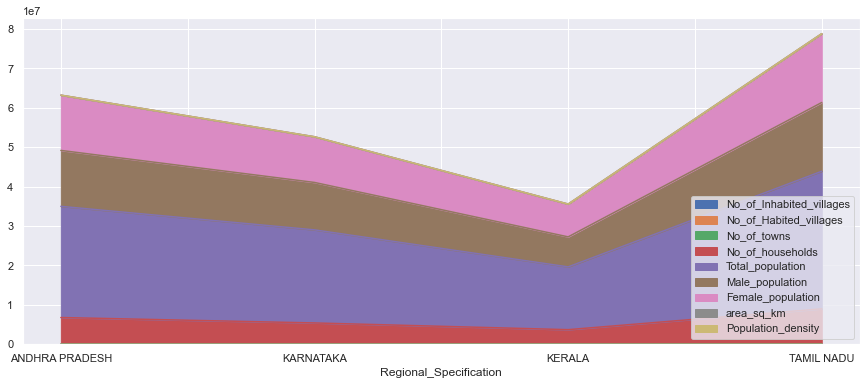

In [38]:
state_pa_Urban.plot.area(stacked=True)

In [99]:
total_array=state_x
# total_array.set_index('Regional_Specification')
total_array=total_array.loc[total_array.index.isin(["KERALA","ANDHRA PRADESH",'TAMIL NADU','KARNATAKA'])]
total_array.reset_index(inplace=True)
total_array.set_index('Total_rural_urban',inplace=True)
total_array=total_array.loc[total_array.index.isin(['Urban','Rural'])]
total_array.reset_index(inplace=True)
total_array.set_index(['Regional_Specification','Total_rural_urban'],inplace=True)
total_array=total_array['No_of_towns']
total_array

Regional_Specification  Total_rural_urban
ANDHRA PRADESH          Urban                 353.0
                        Rural                   0.0
KARNATAKA               Rural                   0.0
                        Urban                 347.0
KERALA                  Urban                 520.0
                        Rural                   0.0
TAMIL NADU              Urban                1097.0
                        Rural                   0.0
Name: No_of_towns, dtype: float64

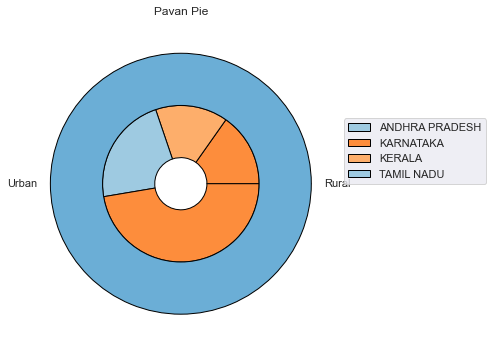

In [100]:
total=total_array.unstack()
total_array=total.values.T
fig, ax = plt.subplots()
size = 0.4
cmap=plt.get_cmap("tab20c")
Exterior = cmap([0,1])
Interior = cmap([2,5,6])
outerlabels=total.columns.tolist()
innerlabels=total.index.tolist()
l2=ax.pie(total_array.flatten(), radius=1-size, colors=Interior,wedgeprops=dict(width=size, edgecolor='black'))
l1=ax.pie(total_array.sum(axis=1), radius=1, colors=Exterior, labels =outerlabels,wedgeprops=dict(width=size, edgecolor='black'))
ax.legend(innerlabels,loc=(1,0.5))
ax.set(aspect="equal", title='Pavan Pie')
plt.show()

In [41]:
# state_pa_Urban_norm = state_pa_Urban.div(state_pa_Urban.sum(axis=0),axis=1)
# # normalized_list=state_pa_Urban.div(required_list.sum(axis=0),axis=1)
# # Plot normalized stacked area chart
# state_pa_Urban_norm.plot.area(stacked=True)

# # Set x-label and y-label
# plt.xlabel('Year')
# plt.ylabel('Proportion of Population')

# # Show plot
# plt.show()

<AxesSubplot:xlabel='Population_density', ylabel='Density'>

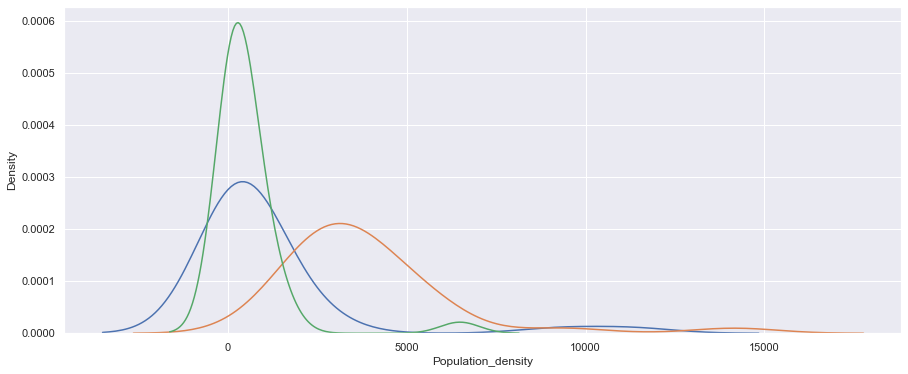

In [42]:
sns.kdeplot(data=state_x_Total,x="Population_density")
sns.kdeplot(data=state_x_Urban,x="Population_density")
sns.kdeplot(data=state_x_Rural,x="Population_density")

<AxesSubplot:xlabel='Population_density', ylabel='Count'>

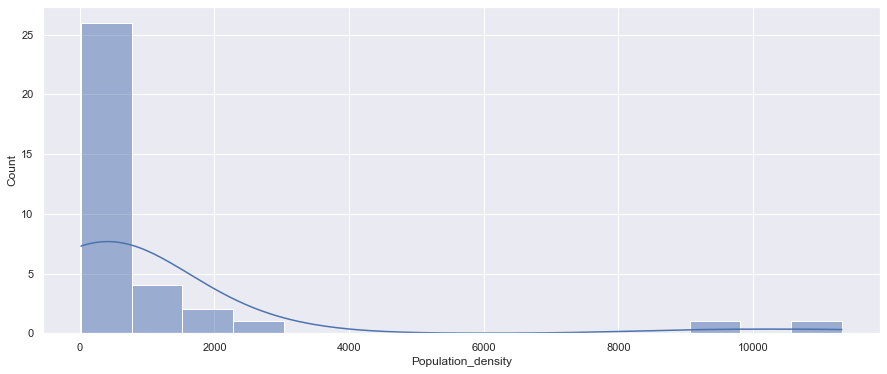

In [43]:
sns.histplot(data=state_x_Total,x="Population_density",bins=15,kde=True,)#log_scale=True)

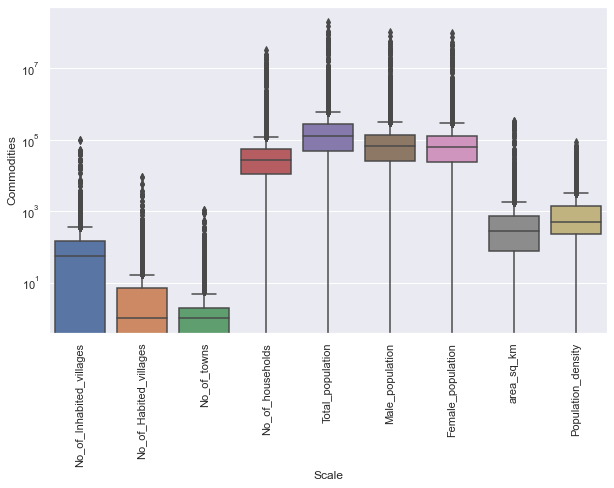

In [44]:
sns.set(rc={"figure.figsize":(10, 6)})
sns.color_palette("Spectral", as_cmap=True)
pa2=sns.boxplot(data=df1)
pa2.set_xticklabels(pa2.get_xticklabels(), rotation=90)
pa2.set_xlabel("Scale")
pa2.set_yscale('log') # Applying to log-scale
pa2.set_ylabel("Commodities")
print()

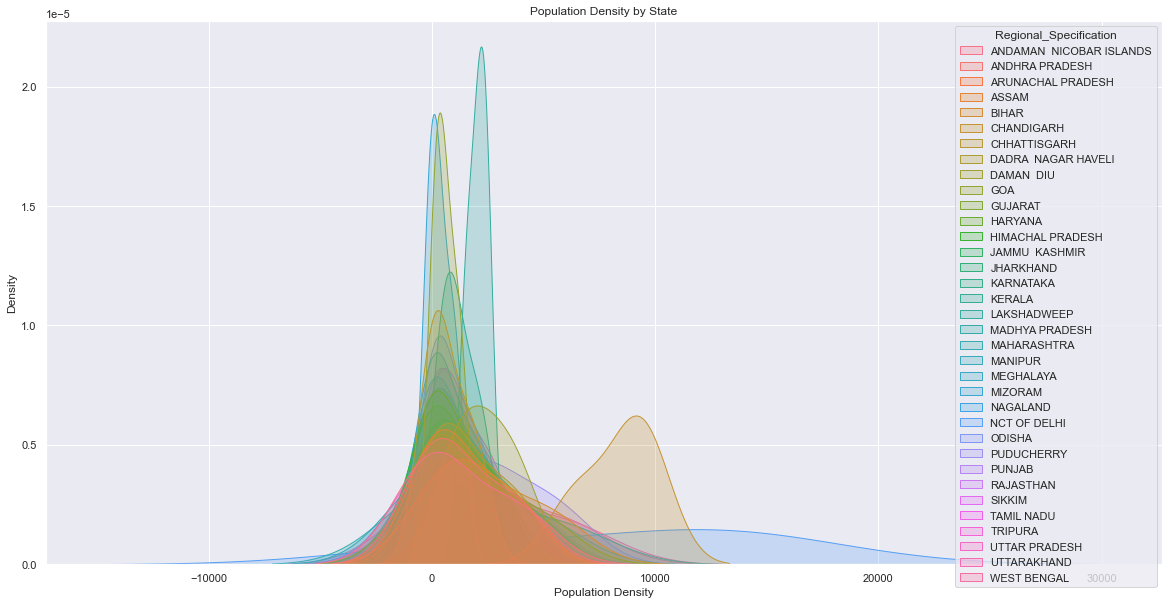

In [45]:
state_df = df1.loc[df1.index.get_level_values('Regional_Category') == 'STATE']

# Create a KDE plot of the population density by state
plt.figure(figsize=(20,10))
sns.kdeplot(x='Population_density', hue='Regional_Specification', data=state_df, shade=True,warn_singular=False)
plt.title('Population Density by State')
plt.xlabel('Population Density')
plt.show()

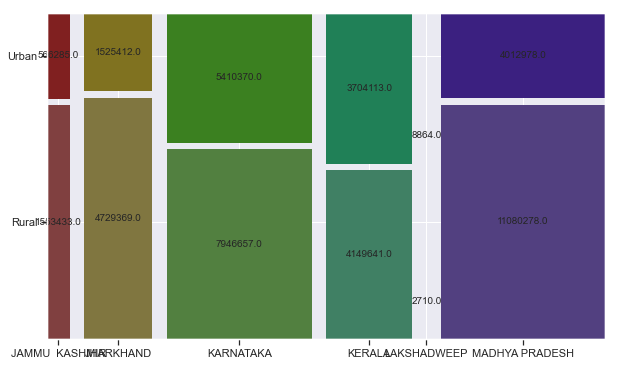

In [46]:
from statsmodels.graphics.mosaicplot import mosaic
state_m=state_x.reset_index()
state_m=state_m[state_m.Total_rural_urban!='Total']
state_m.set_index(['Regional_Specification','Total_rural_urban'],inplace=True,drop=True)
# state_m=state_m.sort_values(by='No_of_households')
total=state_m["No_of_households"]
total=total.iloc[26:38]
dic= total.to_dict()
labelizer = lambda k:dic[k]
mosaic(total,labelizer =labelizer,gap=0.03)
plt.show()

In [47]:
import plotly.express as px

State_m=state_x.reset_index()
# District_m=District_m[District_m.Total_rural_urban!='Total']
State_m['gender_ratio']=State_m['Male_population']/State_m['Female_population']
State_m=State_m[:27]
fig = px.treemap(State_m, path=["Regional_Specification","Total_rural_urban"], values="gender_ratio")
fig.show()

C:\Users\Admin\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
C:\Users\Admin\Anaconda\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


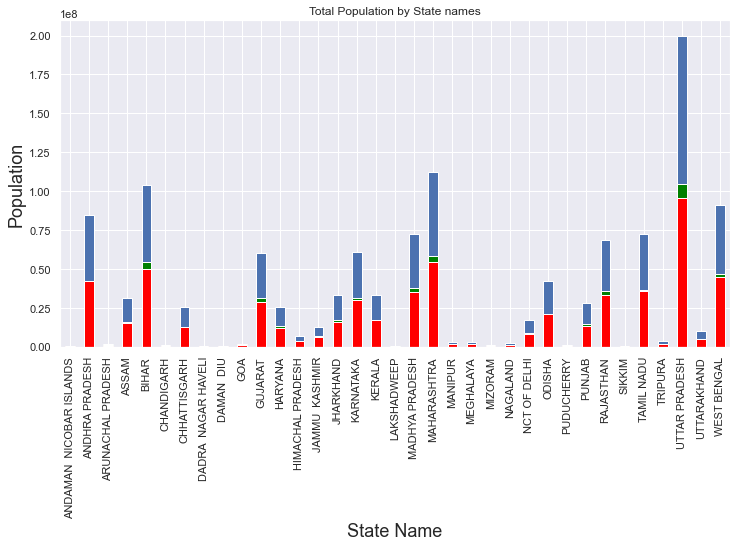

In [48]:
state_df = df1.loc[df1.index.get_level_values('Regional_Category') == 'STATE']
state_df = state_df.loc[state_df.index.get_level_values('Total_rural_urban') == 'Total']

state_df_x = state_df.reset_index().set_index('Regional_Specification', drop=True)
plt.figure(figsize=(12,6))
# Create a bar chart of the 'Total_population' column
state_df_x['Total_population'].plot(kind='bar')
state_df_x['Male_population'].plot(kind='bar',color='green')
state_df_x['Female_population'].plot(kind='bar',color='red')
plt.title('Total Population by State names')
plt.xlabel('State Name', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [49]:
state_x.head()

Regional_Category    Regional_Specification Total_rural_urban  \
0             STATE  ANDAMAN  NICOBAR ISLANDS             Urban   
1             STATE  ANDAMAN  NICOBAR ISLANDS             Total   
2             STATE  ANDAMAN  NICOBAR ISLANDS             Rural   
3             STATE            ANDHRA PRADESH             Total   
4             STATE            ANDHRA PRADESH             Urban   

   No_of_Inhabited_villages  No_of_Habited_villages  No_of_towns  \
0                       0.0                     0.0          5.0   
1                     396.0                   159.0          5.0   
2                     396.0                   159.0          0.0   
3                   26286.0                  1514.0        353.0   
4                       0.0                     0.0        353.0   

   No_of_households  Total_population  Male_population  Female_population  \
0           36021.0          143488.0          76584.0            66904.0   
1           94551.0          380581.0         202871.0           177710.0   
2           58530.0          237093.0         126287.0           110806.0   
3        21022588.0        84580777.0       42442146.0         42138631.0   
4         6788201.0        28219075.0       14198905.0         14020170.0   

   area_sq_km  Population_density  
0       37.92              3784.0  
1     8249.00                46.0  
2     8211.08                29.0  
3   275045.00               308.0  
4     7854.50              3593.0

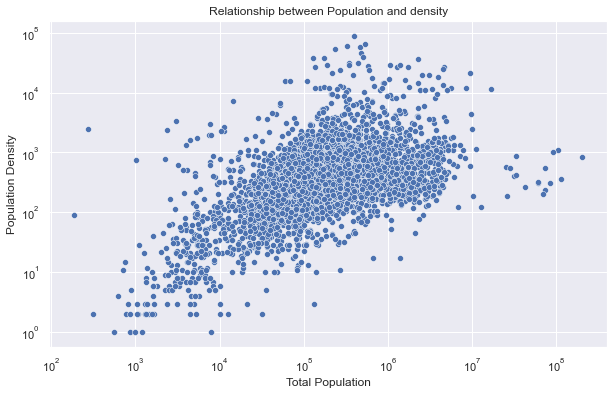

In [50]:
# Get unique state names
states = df1.index.get_level_values('Regional_Specification').unique()

# Create a scatter plot for every state
    # Select rows where the 'Regional_Specification' index has a value of the current state
state_df = df1.loc[df1.index.get_level_values('Regional_Specification').isin(states)]

# Select rows where the 'Total_rural_urban' index has a value of 'Total'
state_df = state_df.loc[state_df.index.get_level_values('Total_rural_urban') == 'Total']

# Create a scatter plot
sns.scatterplot(x="Total_population", y="Population_density", data=state_df)
# plt.title(f'Relationship between Total Population and Population Density in {state}')
plt.xlabel('Total Population')
plt.ylabel('Population Density')
plt.title('Relationship between Population and density')
plt.xscale('log')
plt.yscale('log')
x = np.linspace(-100000, 10000, 10000000)
# y = x
# plt.plot(x,y)
plt.show()


In [51]:
Sub_District_x = df1.loc[df1.index.get_level_values('Regional_Category')=='SUB-DISTRICT']
#For Urban Areas
Sub_District_x_Urban = Sub_District_x.loc[Sub_District_x.index.get_level_values('Total_rural_urban')=='Urban']
# For Rural areas
Sub_District_x_Rural=Sub_District_x.loc[Sub_District_x.index.get_level_values('Total_rural_urban')=='Rural']
# For States (Urban and Rural areas both inclueded)
Sub_District_x_Total=Sub_District_x.loc[Sub_District_x.index.get_level_values('Total_rural_urban')=='Total']

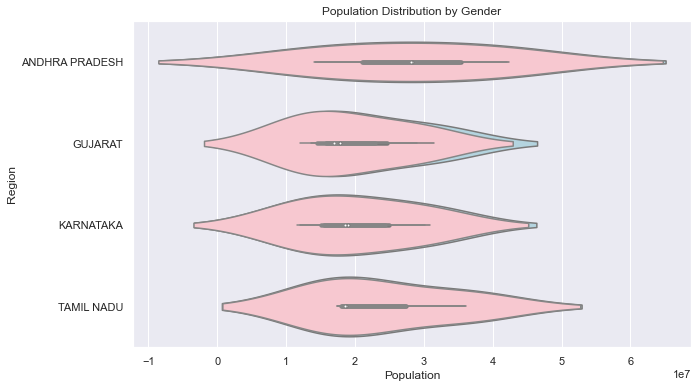

In [52]:
states=['ANDHRA PRADESH','GUJARAT','TAMIL NADU','KARNATAKA','TAMIL NADU']
state_df_z = df1.loc[df1.index.get_level_values('Regional_Specification').isin(states)]
state_df_z = state_df_z.reset_index()
# Create a violin plot
sns.violinplot(x="Male_population", y="Regional_Specification", data=state_df_z, color='lightblue',dodge=False,split=True,alpha=0.5)
sns.violinplot(x="Female_population", y="Regional_Specification", data=state_df_z, color='pink',dodge=False,split=True,alpha=10)
plt.title('Population Distribution by Gender')
plt.xlabel('Population')
plt.ylabel('Region')
plt.show()

In [53]:
# df1.index.get_level_values('Regional_Specification').unique()

In [54]:
# Check for Normalization as well

# Remember sir discussed one plotting technique to check 

# If normal then You Follow Z-test to remove outliers

In [55]:
df1.describe()

No_of_Inhabited_villages  No_of_Habited_villages   No_of_towns  \
count              14252.000000            14252.000000  14252.000000   
mean                 238.309641               17.085111      3.313360   
std                 1924.818412              162.640518     25.608711   
min                    0.000000                0.000000      0.000000   
25%                    0.000000                0.000000      0.000000   
50%                   55.000000                1.000000      1.000000   
75%                  146.000000                7.000000      2.000000   
max                97814.000000             8960.000000   1097.000000   

       No_of_households  Total_population  Male_population  Female_population  \
count      1.425200e+04      1.425200e+04     1.425200e+04       1.425200e+04   
mean       9.927725e+04      4.831783e+05     2.486717e+05       2.345066e+05   
std        7.064159e+05      3.557533e+06     1.839427e+06       1.718647e+06   
min        0.000000e+00      0.000000e+00     0.000000e+00       0.000000e+00   
25%        1.112450e+04      4.994100e+04     2.523200e+04       2.462575e+04   
50%        2.703700e+04      1.298395e+05     6.636600e+04       6.309300e+04   
75%        5.516300e+04      2.708642e+05     1.393910e+05       1.312335e+05   
max        3.344804e+07      1.998123e+08     1.044805e+08       9.533183e+07   

          area_sq_km  Population_density  
count   14153.000000        14153.000000  
mean     1261.025216         1460.117714  
std      9756.945479         3201.160006  
min         0.000000            0.000000  
25%        75.530000          226.000000  
50%       286.070000          499.000000  
75%       756.850000         1405.000000  
max    342239.000000        89185.000000

In [56]:
df1.corr()

No_of_Inhabited_villages  No_of_Habited_villages  \
No_of_Inhabited_villages                  1.000000                0.928360   
No_of_Habited_villages                    0.928360                1.000000   
No_of_towns                               0.377062                0.329103   
No_of_households                          0.867222                0.804618   
Total_population                          0.894022                0.849228   
Male_population                           0.893870                0.850749   
Female_population                         0.893902                0.847332   
area_sq_km                                0.834288                0.659069   
Population_density                       -0.038517               -0.030624   

                          No_of_towns  No_of_households  Total_population  \
No_of_Inhabited_villages     0.377062          0.867222          0.894022   
No_of_Habited_villages       0.329103          0.804618          0.849228   
No_of_towns                  1.000000          0.670955          0.635967   
No_of_households             0.670955          1.000000          0.988725   
Total_population             0.635967          0.988725          1.000000   
Male_population              0.632948          0.986665          0.999858   
Female_population            0.638998          0.990617          0.999837   
area_sq_km                   0.373566          0.797417          0.779114   
Population_density           0.039442          0.006022          0.005270   

                          Male_population  Female_population  area_sq_km  \
No_of_Inhabited_villages         0.893870           0.893902    0.834288   
No_of_Habited_villages           0.850749           0.847332    0.659069   
No_of_towns                      0.632948           0.638998    0.373566   
No_of_households                 0.986665           0.990617    0.797417   
Total_population                 0.999858           0.999837    0.779114   
Male_population                  1.000000           0.999391    0.775731   
Female_population                0.999391           1.000000    0.782488   
area_sq_km                       0.775731           0.782488    1.000000   
Population_density               0.006088           0.004393   -0.043324   

                          Population_density  
No_of_Inhabited_villages           -0.038517  
No_of_Habited_villages             -0.030624  
No_of_towns                         0.039442  
No_of_households                    0.006022  
Total_population                    0.005270  
Male_population                     0.006088  
Female_population                   0.004393  
area_sq_km                         -0.043324  
Population_density                  1.000000

<AxesSubplot:>

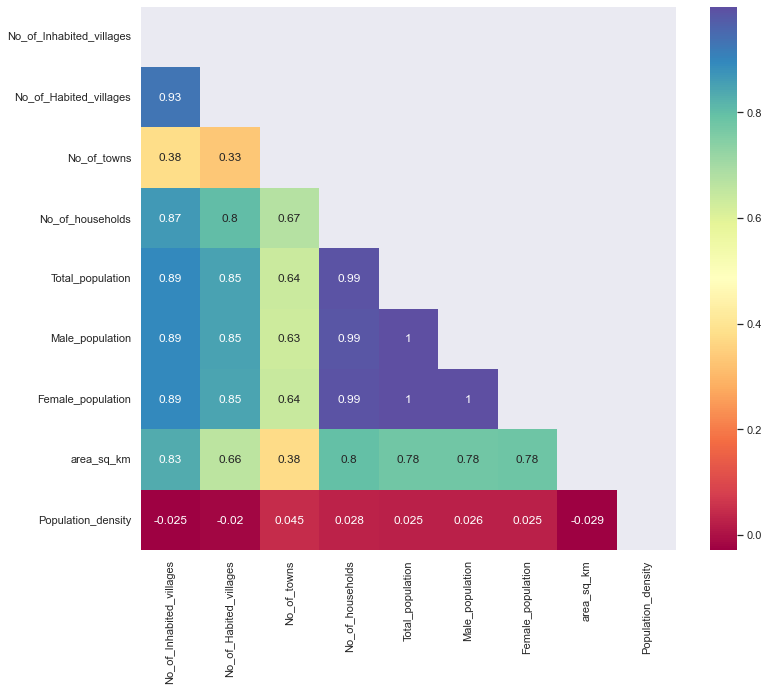

In [57]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
sns.heatmap(corr, annot=True, mask = mask, cmap='Spectral')

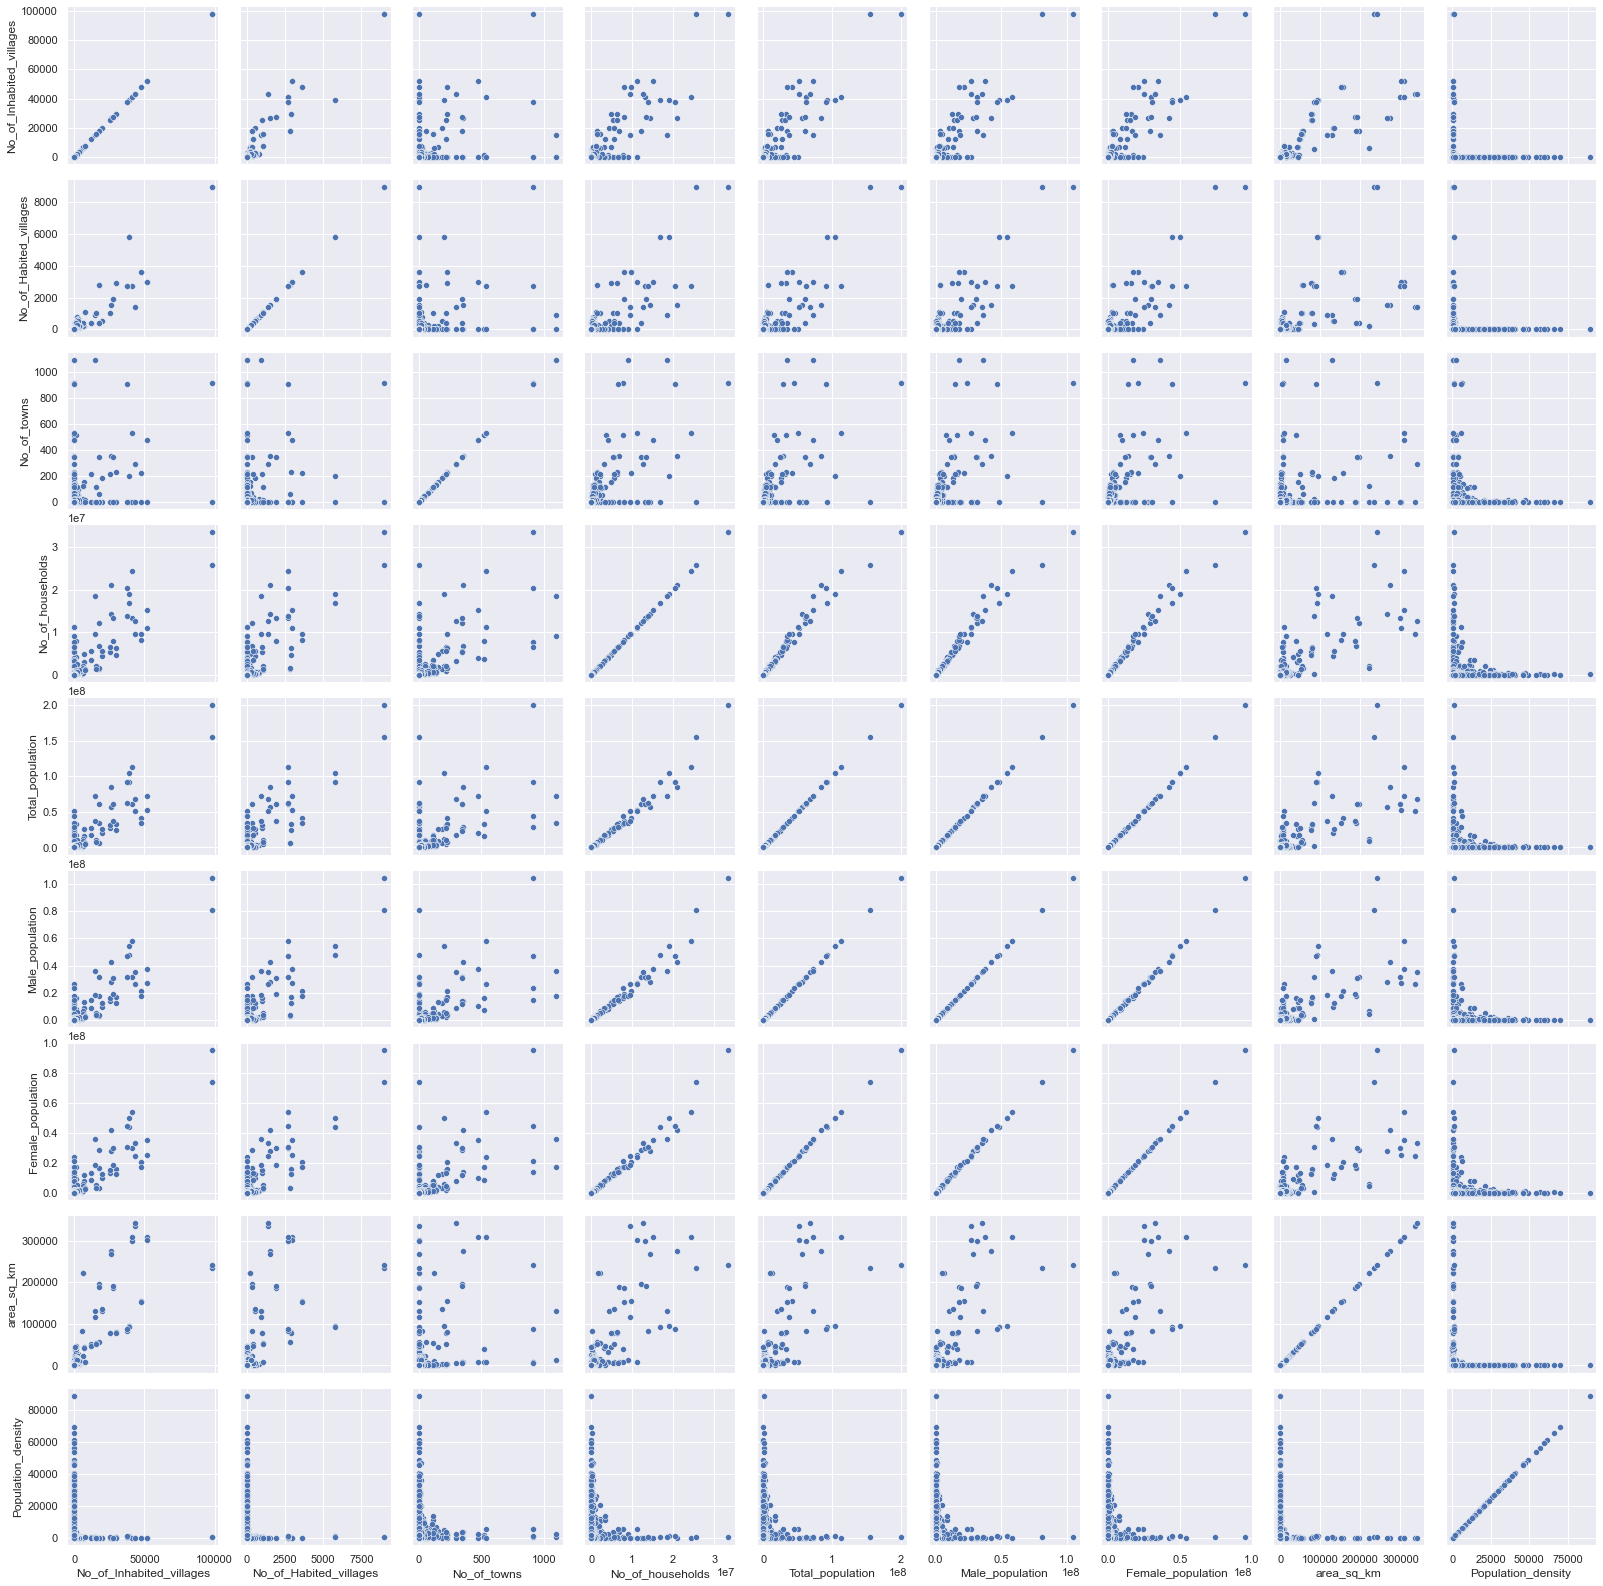

In [58]:
pa1 = sns.PairGrid(df1)
pa1.map(sns.scatterplot)

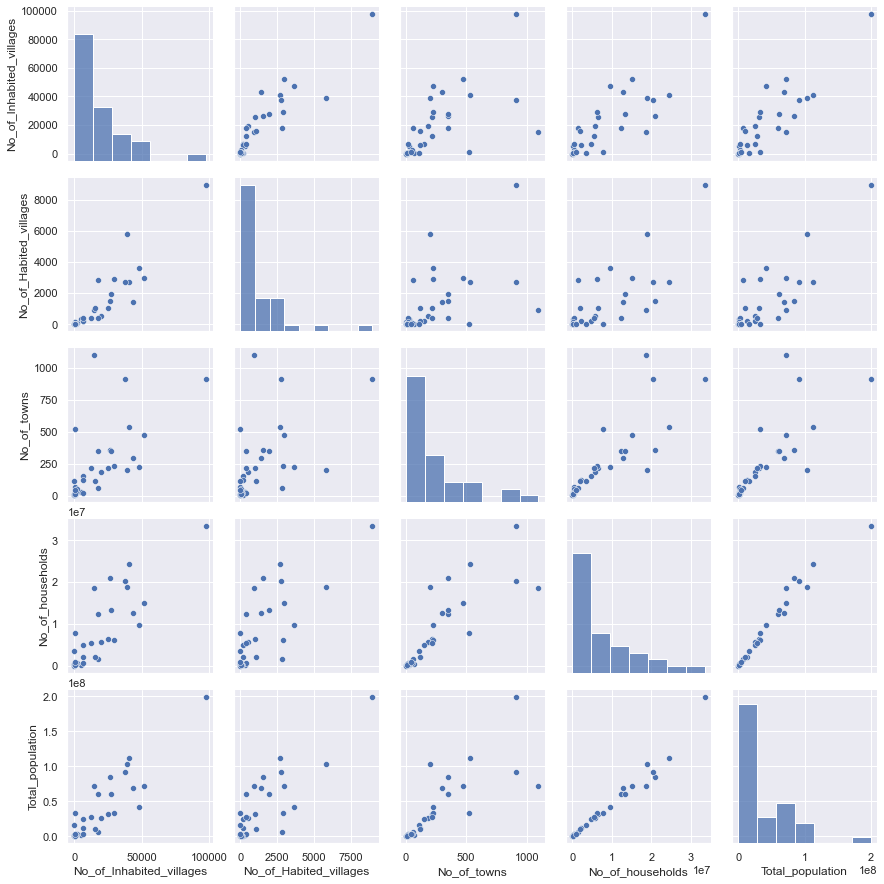

In [59]:
sns.pairplot(data=state_x_Total[["No_of_Inhabited_villages", "No_of_Habited_villages", "No_of_towns", "No_of_households", "Total_population"]], diag_kind="hist")
plt.show()

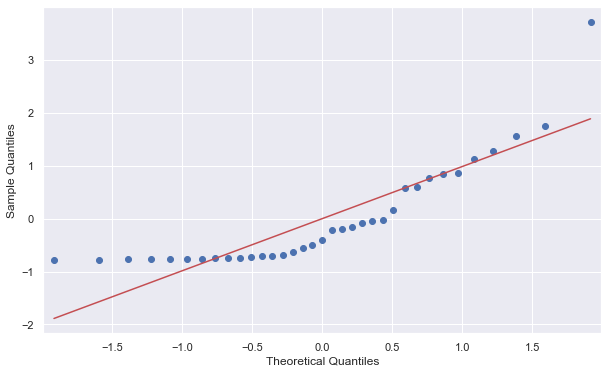

In [60]:
from statsmodels.graphics.gofplots import qqplot
dt=(state_x_Total['Total_population']-state_x_Total['Total_population'].mean())/state_x_Total['Total_population'].std()
# print(dt)
qqplot(dt,line='s')
plt.show()

In [61]:
# df1.index.get_level_values('Regional_Category').unique()
# df1.index.get_level_values('Total_rural_urban').unique()

In [62]:
from scipy.stats import ttest_ind

male_population = df1["Male_population"]
female_population = df1["Female_population"]

# perform the t-test for independent samples
t_stat, p_value = ttest_ind(male_population, female_population,equal_var=False)

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.6717521800211245
p-value: 0.5017469460852522


In [63]:
IQR=df1["Total_population"].quantile(0.75)-df1["Total_population"].quantile(0.25)
IQR

220923.25

In [64]:
# data_sort=df1["Total_population"].sort_values()
# idx=len(data_sort)*0.25
# print(idx)
# #idx=math.floor(idx)
# th=data_sort.iloc[-1]
# sm=idx+1
# while sm>idx:
#     sm=(data_sort<=th).sum()
#     th=th-0.1
# th=th+0.1
# print(th)

21325.000064270207

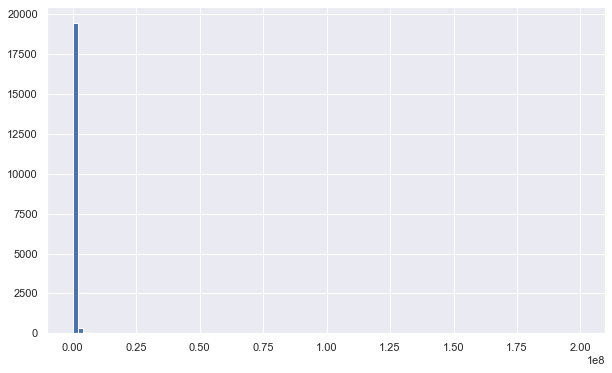

In [65]:
import math
_=plt.hist(df["Total_population"],bins=100)
# plt.xscale('log')
standard_error=np.std(df["Total_population"])/math.sqrt(len(df["Total_population"]))
standard_error

<AxesSubplot:xlabel='Population_density', ylabel='Count'>

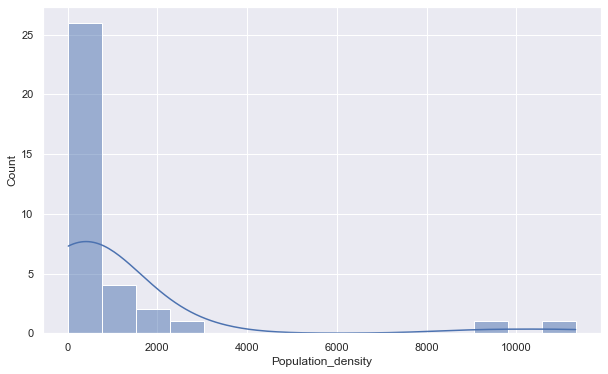

In [66]:
sns.histplot(data=state_x_Total,x="Population_density",bins=15,kde=True)

In [67]:
number_of_samples=10000 #R
size_of_sample=100 #n
sample_mean_1=[]
for i in range(number_of_samples):
    sample_mean_1.append(np.mean(np.random.choice(df['Total_population'],size_of_sample,replace=False)))
#sample_mean

2978.880782584171

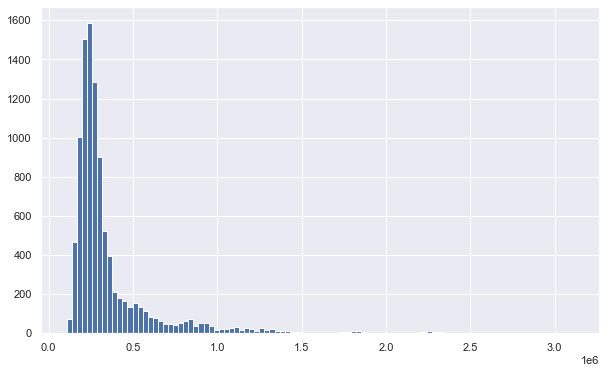

In [68]:
_=plt.hist(sample_mean_1,bins=100)
standard_error=np.std(sample_mean_1)/math.sqrt(len(sample_mean_1))
standard_error

In [69]:
number_of_samples=10000 # R times
size_of_sample=10000  # n
sample_mean_2=[]
for i in range(number_of_samples):
    # Calulate mean for n samples
    sample_mean_2.append(np.mean(np.random.choice(df['Total_population'],size_of_sample,replace=True)))

304.01702463156124

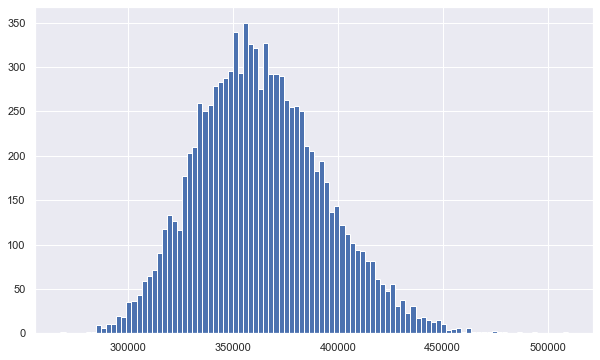

In [70]:
_=plt.hist(sample_mean_2,bins=100)
standard_error=np.std(sample_mean_2)/math.sqrt(len(sample_mean_2))
standard_error

In [71]:
CI=0.95
sorted_means=np.sort(sample_mean_2)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 308836.6246
Upper level : 427293.2022


In [72]:
male_population=df[df.Total_rural_urban=='Total']
male_population=male_population['Male_population']

female_population=df[df.Total_rural_urban=='Total']
female_population=female_population['Female_population']

In [73]:
print(male_population.mean())
print(female_population.mean())

280625.960378208
264558.6307969383


In [74]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(male_population, female_population, equal_var=True)

# Print results
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: 0.45249202668571525
P-Value: 0.6509219309045846


# The t-statistic measures the difference between the means of two groups relative to the variation within each group. In this case, the t-statistic is 0.452 and the p-value is 0.651, which indicates that there is no significant difference between the male and female populations in the selected state .

In [133]:
male_population=state_x
male_population=male_population.loc[male_population.index.isin(["KERALA","ANDHRA PRADESH",'TAMIL NADU','KARNATAKA'])]
male_population.reset_index(inplace=True)
male_population=male_population[male_population.Total_rural_urban!='Total']
male_population.set_index(['Regional_Specification','Total_rural_urban'],inplace=True)
male_population=male_population['Male_population']

female_population=state_x
female_population=female_population.loc[female_population.index.isin(["KERALA","ANDHRA PRADESH",'TAMIL NADU','KARNATAKA'])]
female_population.reset_index(inplace=True)
female_population=female_population[female_population.Total_rural_urban!='Total']
female_population.set_index(['Regional_Specification','Total_rural_urban'],inplace=True)
female_population=female_population['Female_population']

In [134]:
male_population=male_population.unstack()
female_population=female_population.unstack()
female_population

Total_rural_urban            Rural       Urban
Regional_Specification                        
ANDHRA PRADESH          28118461.0  14020170.0
KARNATAKA               18539981.0  11588659.0
KERALA                   9063081.0   8315568.0
TAMIL NADU              18550525.0  17458530.0

In [132]:
from scipy import stats
cont_table = pd.crosstab(male_population['Rural'], male_population['Urban'], margins=True)

# perform the chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)

Chi-square statistic: 12.0
Degrees of freedom: 16
p-value: 0.743979760453717


In [136]:
chi2_stat, p_val, dof, expected = stats.chi2_contingency(male_population)
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)

Chi-square statistic: 2140115.20925323
Degrees of freedom: 3
p-value: 0.0


# The p-value for the chi-square test is very small (1.614083317169845e-32), which is less than the usual significance level of 0.05. This means that we can reject the null hypothesis that there is no association between the categorical variables (male and female populations) and the state names.

Therefore, we can conclude that there is a significant association between male and female populations and the state names. This implies that there might be underlying factors or reasons that contribute to the differences in male and female populations across different states. However, we cannot determine the direction or causality of this association from this test alone.

In [75]:
state_x_Total

Regional_Category Total_rural_urban  \
Regional_Specification                                         
ANDAMAN  NICOBAR ISLANDS             STATE             Total   
ANDHRA PRADESH                       STATE             Total   
ARUNACHAL PRADESH                    STATE             Total   
ASSAM                                STATE             Total   
BIHAR                                STATE             Total   
CHANDIGARH                           STATE             Total   
CHHATTISGARH                         STATE             Total   
DADRA  NAGAR HAVELI                  STATE             Total   
DAMAN  DIU                           STATE             Total   
GOA                                  STATE             Total   
GUJARAT                              STATE             Total   
HARYANA                              STATE             Total   
HIMACHAL PRADESH                     STATE             Total   
JAMMU  KASHMIR                       STATE             Total   
JHARKHAND                            STATE             Total   
KARNATAKA                            STATE             Total   
KERALA                               STATE             Total   
LAKSHADWEEP                          STATE             Total   
MADHYA PRADESH                       STATE             Total   
MAHARASHTRA                          STATE             Total   
MANIPUR                              STATE             Total   
MEGHALAYA                            STATE             Total   
MIZORAM                              STATE             Total   
NAGALAND                             STATE             Total   
NCT OF DELHI                         STATE             Total   
ODISHA                               STATE             Total   
PUDUCHERRY                           STATE             Total   
PUNJAB                               STATE             Total   
RAJASTHAN                            STATE             Total   
SIKKIM                               STATE             Total   
TAMIL NADU                           STATE             Total   
TRIPURA                              STATE             Total   
UTTAR PRADESH                        STATE             Total   
UTTARAKHAND                          STATE             Total   
WEST BENGAL                          STATE             Total   

                          No_of_Inhabited_villages  No_of_Habited_villages  \
Regional_Specification                                                       
ANDAMAN  NICOBAR ISLANDS                     396.0                   159.0   
ANDHRA PRADESH                             26286.0                  1514.0   
ARUNACHAL PRADESH                           5258.0                   331.0   
ASSAM                                      25372.0                  1023.0   
BIHAR                                      39073.0                  5801.0   
CHANDIGARH                                     5.0                     0.0   
CHHATTISGARH                               19567.0                   559.0   
DADRA  NAGAR HAVELI                           65.0                     0.0   
DAMAN  DIU                                    19.0                     0.0   
GOA                                          320.0                    14.0   
GUJARAT                                    17843.0                   382.0   
HARYANA                                     6642.0                   199.0   
HIMACHAL PRADESH                           17882.0                  2808.0   
JAMMU  KASHMIR                              6337.0                   216.0   
JHARKHAND                                  29492.0                  2902.0   
KARNATAKA                                  27397.0                  1943.0   
KERALA                                      1017.0                     1.0   
LAKSHADWEEP                                    6.0                    15.0   
MADHYA PRADESH                             51929.0                  2974.0   
MAHARASHTRA       